# Churn Prediction
In this project, we will try to predict **churn** of customer in a certain telco company. The data is from <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">Kaggle</a>. And here is an explanation about the data we will be using:

<ol>
    <li>Each row represents a customer, each column contains customer's attributes described on the column Metadata</li>
    <li>The data set includes information about:</li>
    <ul>
        <li>Customers who left within the last month - the column is called Churn</li>
        <li>Services that each customer has signed up for - phone, multiple lines, internet, online security, online
            backup, device protection, tech support, and streaming TV and movies.</li>
        <li>Demographic info about customers - gender, age range, and if they have partners and dependents</li>
    </ul>
</ol>
        

<table>

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

### Data Overview

<table>
    <thead>
        <th>Column</th>
        <th>Description</th>
    </thead>
    <tbody>
        <tr>
            <td>customerID</td>
            <td>Customer ID</td>
        </tr>
        <tr>
            <td>gender</td>
            <td>Whether the customer is a male or a female</td>
        </tr>
        <tr>
            <td>SeniorCitizen</td>
            <td>Whether the customer is a senior citizen or not (1,0)</td>
        </tr>
        <tr>
            <td>Partner</td>
            <td>Whether the customer has a partner or not (Yes, No)</td>
        </tr>
        <tr>
            <td>Dependents</td>
            <td>Whether the customer has dependents or not (Yes, No)</td>
        </tr>
        <tr>
            <td>tenure</td>
            <td>Number of months the customer has stayed with the company</td>
        </tr>
        <tr>
            <td>PhoneService</td>
            <td>Whether the customer has a phone service or not (Yes, No)</td>
        </tr>
        <tr>
            <td>MultipleLines</td>
            <td>Whether the customer has multiple lines or not (Yes, No, No phone service)</td>
        </tr>
        <tr>
            <td>InternetService</td>
            <td>Customer's internet service provider (DSL, Fiber optic, No)</td>
        </tr>
        <tr>
            <td>OnlineSecurity</td>
            <td>Whether the customer has online security or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>OnlineBackup</td>
            <td>Whether the customer has online backup or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>DeviceProtection</td>
            <td>Whether the customer has device protection or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>TechSupport</td>
            <td>Whether the customer has tech support or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>StreamingTV</td>
            <td>Whether the customer has streamingTV or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>StreamingMovies</td>
            <td>Whether the customer has streaming movies or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>Contract</td>
            <td>The contract term of the customer (Month-to-month, One year, Two year)</td>
        </tr>
        <tr>
            <td>PaperlessBilling</td>
            <td>Whether the customer has paperless billing or not (Yes, No)</td>
        </tr>
        <tr>
            <td>PaymentMethod</td>
            <td>The customer's payment methid (Electronic check, Mailed check, Bank transfer (automatic), Credit card
                (automatic))</td>
        </tr>
        <tr>
            <td>MonthlyCharges</td>
            <td>The amount charged to the customer monthly</td>
        </tr>
        <tr>
            <td>TotalCharges</td>
            <td>The total amount charges to the customer</td>
        </tr>
        <tr>
            <td>Churn</td>
            <td>Whether the customer churned or not (Yes or No)</td>
        </tr>
    </tbody>
</table>
        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re
%matplotlib inline

First of all, read the dataset using pandas

In [2]:
# Read a csv file and convert it into DataFrame
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
# Show some of the rows in the DataFrame
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

---

## Exploratory Data Analysis (EDA)
Now, it's time to explore the data. The purpose of EDA is to gain insights and undestand the data characteristics, which can help to inform further analysis an model development.

---

In [4]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


---
From our code(`data.info`) the output shows us that there are no null values which is a rare case. In real-world data, null value is actually pretty common.

Because there are no null values, we can **skip** the part where we:
* Fill the null values

OR
* Delete rows with null values

Next, what i like to do is to see the general information of each columns in our dataset. Information such as data type, null values, null values percentage, unique data per column, and sampe of unique data.

---

In [6]:
# We will set this as a function so that we can easily see the updated value

def data_desc():
    columns=[]
    for col in df.columns:
        columns.append([col, df[col].dtypes, df.shape[0], df[col].isnull().sum(), round((df[col].isna().sum()/len(df[col])) * 100,3),
                        df[col].nunique(), list(df[col].unique())])
    desc = pd.DataFrame(data=columns, columns=['dataFeatures', 'dataType', 'dataLength', 'null', 'nullPct', 'unique', 'uniqueSample'])
    return desc
data_desc()

dataFeatures dataType  dataLength  null  nullPct  unique  \
0         customerID   object        7043     0      0.0    7043   
1             gender   object        7043     0      0.0       2   
2      SeniorCitizen    int64        7043     0      0.0       2   
3            Partner   object        7043     0      0.0       2   
4         Dependents   object        7043     0      0.0       2   
5             tenure    int64        7043     0      0.0      73   
6       PhoneService   object        7043     0      0.0       2   
7      MultipleLines   object        7043     0      0.0       3   
8    InternetService   object        7043     0      0.0       3   
9     OnlineSecurity   object        7043     0      0.0       3   
10      OnlineBackup   object        7043     0      0.0       3   
11  DeviceProtection   object        7043     0      0.0       3   
12       TechSupport   object        7043     0      0.0       3   
13       StreamingTV   object        7043     0      0.0       3   
14   StreamingMovies   object        7043     0      0.0       3   
15          Contract   object        7043     0      0.0       3   
16  PaperlessBilling   object        7043     0      0.0       2   
17     PaymentMethod   object        7043     0      0.0       4   
18    MonthlyCharges  float64        7043     0      0.0    1585   
19      TotalCharges   object        7043     0      0.0    6531   
20             Churn   object        7043     0      0.0       2   

                                         uniqueSample  
0   [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...  
1                                      [Female, Male]  
2                                              [0, 1]  
3                                           [Yes, No]  
4                                           [No, Yes]  
5   [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...  
6                                           [No, Yes]  
7                         [No phone service, No, Yes]  
8                              [DSL, Fiber optic, No]  
9                      [No, Yes, No internet service]  
10                     [Yes, No, No internet service]  
11                     [No, Yes, No internet service]  
12                     [No, Yes, No internet service]  
13                     [No, Yes, No internet service]  
14                     [No, Yes, No internet service]  
15               [Month-to-month, One year, Two year]  
16                                          [Yes, No]  
17  [Electronic check, Mailed check, Bank transfer...  
18  [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...  
19  [29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5...  
20                                          [No, Yes]

---

From table above, if you analyze it one by one, you  will see that there are something strange. That something is in `Total Charges` column. This column has 6000+ unique values, and in the unique sample you can clearly see that it is in form of numbers. But this column has a datatype of object (not float or integer). We can set this as our fist task:

* **Change DataType of `TotalCharges` column from object to float**

To change data type to float, we can use either `pd.to_numeric(df)` or `df.astype('float')`. Both are from pandas library. For our case here, i will use `pd.to_numeric` for no specific reason

---

In [7]:
# Here, we set the value of "errors" parameter to "coerce"
# We do this to set the value to NaN if there are any invalid parsing (errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Let's check the dataset
data_desc()

dataFeatures dataType  dataLength  null  nullPct  unique  \
0         customerID   object        7043     0    0.000    7043   
1             gender   object        7043     0    0.000       2   
2      SeniorCitizen    int64        7043     0    0.000       2   
3            Partner   object        7043     0    0.000       2   
4         Dependents   object        7043     0    0.000       2   
5             tenure    int64        7043     0    0.000      73   
6       PhoneService   object        7043     0    0.000       2   
7      MultipleLines   object        7043     0    0.000       3   
8    InternetService   object        7043     0    0.000       3   
9     OnlineSecurity   object        7043     0    0.000       3   
10      OnlineBackup   object        7043     0    0.000       3   
11  DeviceProtection   object        7043     0    0.000       3   
12       TechSupport   object        7043     0    0.000       3   
13       StreamingTV   object        7043     0    0.000       3   
14   StreamingMovies   object        7043     0    0.000       3   
15          Contract   object        7043     0    0.000       3   
16  PaperlessBilling   object        7043     0    0.000       2   
17     PaymentMethod   object        7043     0    0.000       4   
18    MonthlyCharges  float64        7043     0    0.000    1585   
19      TotalCharges  float64        7043    11    0.156    6530   
20             Churn   object        7043     0    0.000       2   

                                         uniqueSample  
0   [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...  
1                                      [Female, Male]  
2                                              [0, 1]  
3                                           [Yes, No]  
4                                           [No, Yes]  
5   [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...  
6                                           [No, Yes]  
7                         [No phone service, No, Yes]  
8                              [DSL, Fiber optic, No]  
9                      [No, Yes, No internet service]  
10                     [Yes, No, No internet service]  
11                     [No, Yes, No internet service]  
12                     [No, Yes, No internet service]  
13                     [No, Yes, No internet service]  
14                     [No, Yes, No internet service]  
15               [Month-to-month, One year, Two year]  
16                                          [Yes, No]  
17  [Electronic check, Mailed check, Bank transfer...  
18  [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...  
19  [29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5...  
20                                          [No, Yes]

In [8]:
sum(df['TotalCharges'].isna())

11

---

From the updated table above we can see that the successfully change the data type. But now, there are null values in our dataset. That is weird, in our previous data, there were no null values. Why is there a null value now?

To answer this question, i have to dig a little deeper. It turns out from the start, there are null values. Its just it is not stored as a literal null. But it is stored as a **string of whitespace** (`' '`)> Meanwhile the condition for a value to be declared as null is have a value of `NaN`

Now, the next thing we need to think is **How to deal with null values**. As I stated above, there are two ways to deal with null values. **First** is to replace values with other values, it can be simple as a mean or as complex as using *machine learning* to find the suitable value. **Second**, is just to remove the null value. From the table above, we know that there are only 11 null values or about 0,15% of the total data. So it's best to just **remove the null values** as it doesn't have any significant impact to our dataset.

To remove null values we can use `.dropna()` from pandas then specify the column we want to reference.

---

In [9]:
# Using .dropna() to remove null values
# subset parameter is to reference the column we want.
# inplace = True is to declare that we are modifying our original dataset
df.dropna(axis=0, subset=['TotalCharges'], inplace=True)

# Checking the dataset if there still null values
sum(df['TotalCharges'].isna())

0

---

### Data Visualization
Now, there are no null values left in our data. The next step is to visualize our data to find insights or pattern of our data. This step is **not necessary** when building a machine learning model, but it can be very useful to improve our understanding of the dataset.

---

In [10]:
df[['MonthlyCharges','TotalCharges']]

MonthlyCharges  TotalCharges
0              29.85         29.85
1              56.95       1889.50
2              53.85        108.15
3              42.30       1840.75
4              70.70        151.65
...              ...           ...
7038           84.80       1990.50
7039          103.20       7362.90
7040           29.60        346.45
7041           74.40        306.60
7042          105.65       6844.50

[7032 rows x 2 columns]

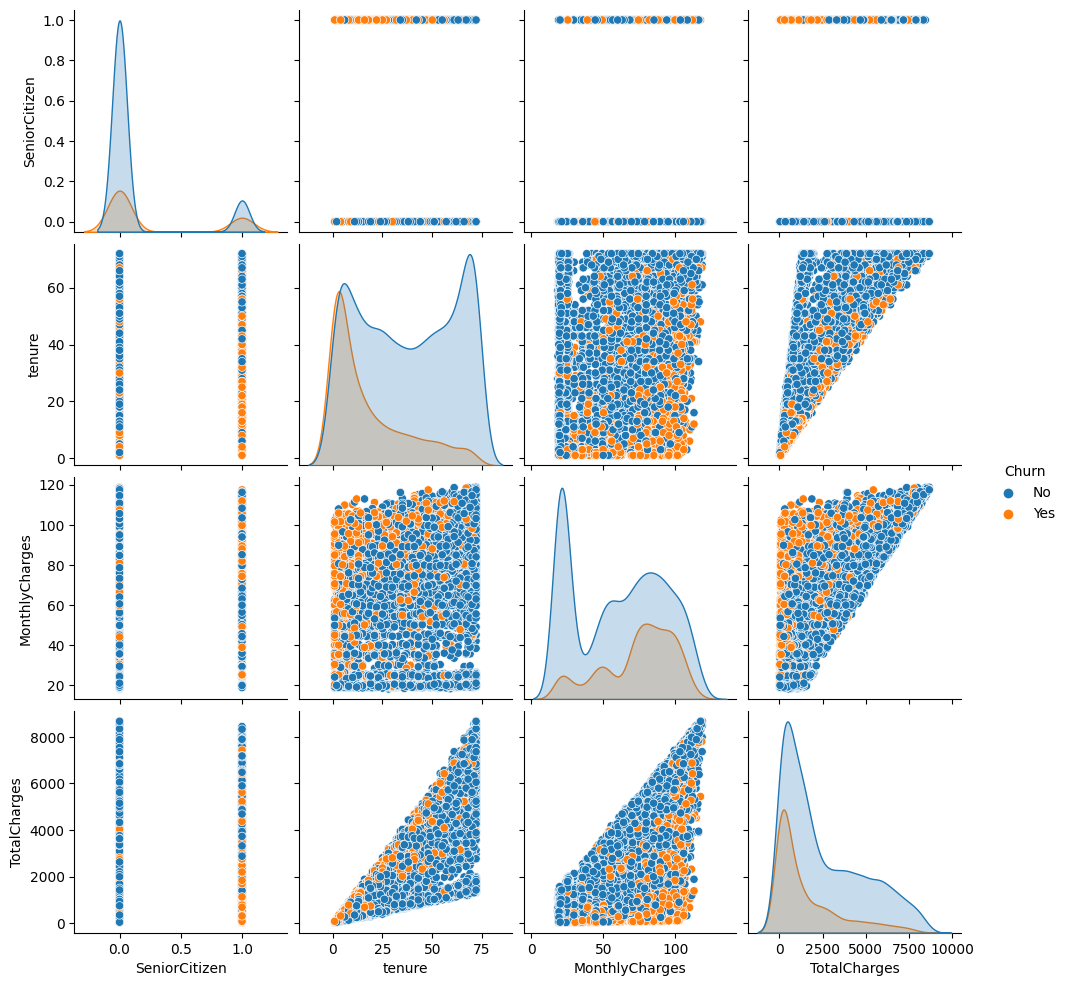

In [11]:
sns.pairplot(df, hue='Churn')

From the plot above, we can see a certain pattern in `TotalCharges` column. Both in `MonthlyCharges` and `tenure` row, low value of both dont have any high value of `TotalCharges`. This is quite obvious considering both of feature are **directly correlated** to `TotalCharges` (if you read the provided *Data Overview*).

---

<Axes: xlabel='TotalCharges', ylabel='Count'>

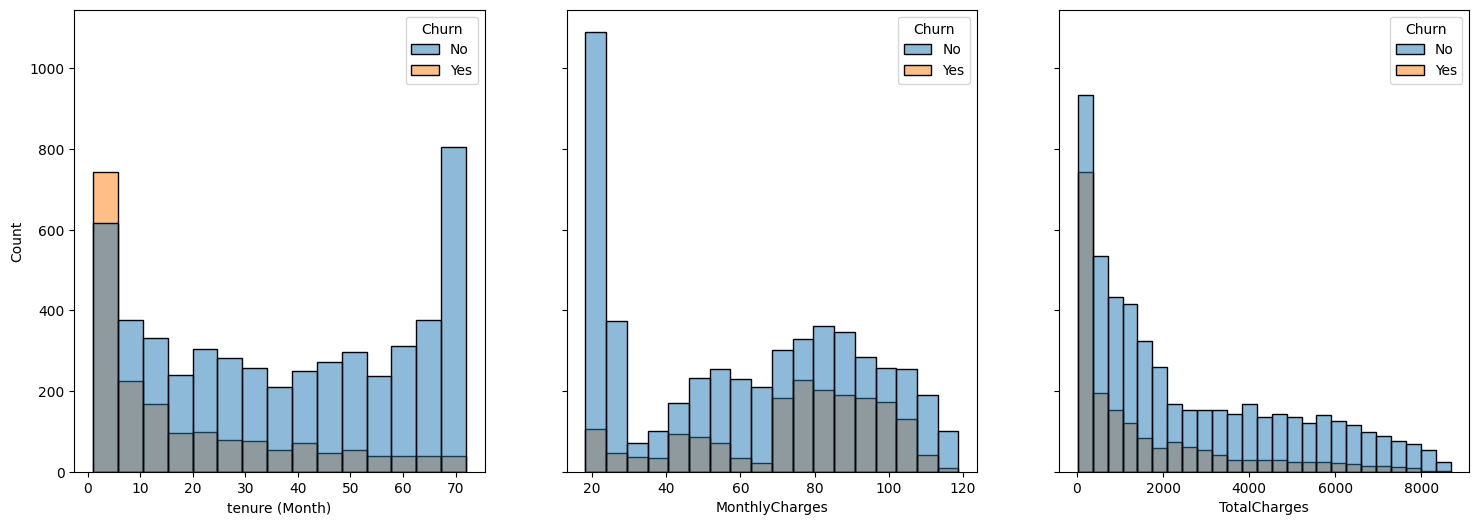

In [12]:
# parameter sharey is used to share the ytickaxis between all parameter
fig, ax = plt.subplots(1,3, figsize=(18,6), sharey=True)
sns.histplot(data=df, x='tenure', hue='Churn', ax=ax[0], multiple='layer')
ax[0].set_xlabel('tenure (Month)')
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', ax=ax[1], multiple='layer')
sns.histplot(data=df, x='TotalCharges', hue='Churn', ax=ax[2], multiple='layer')

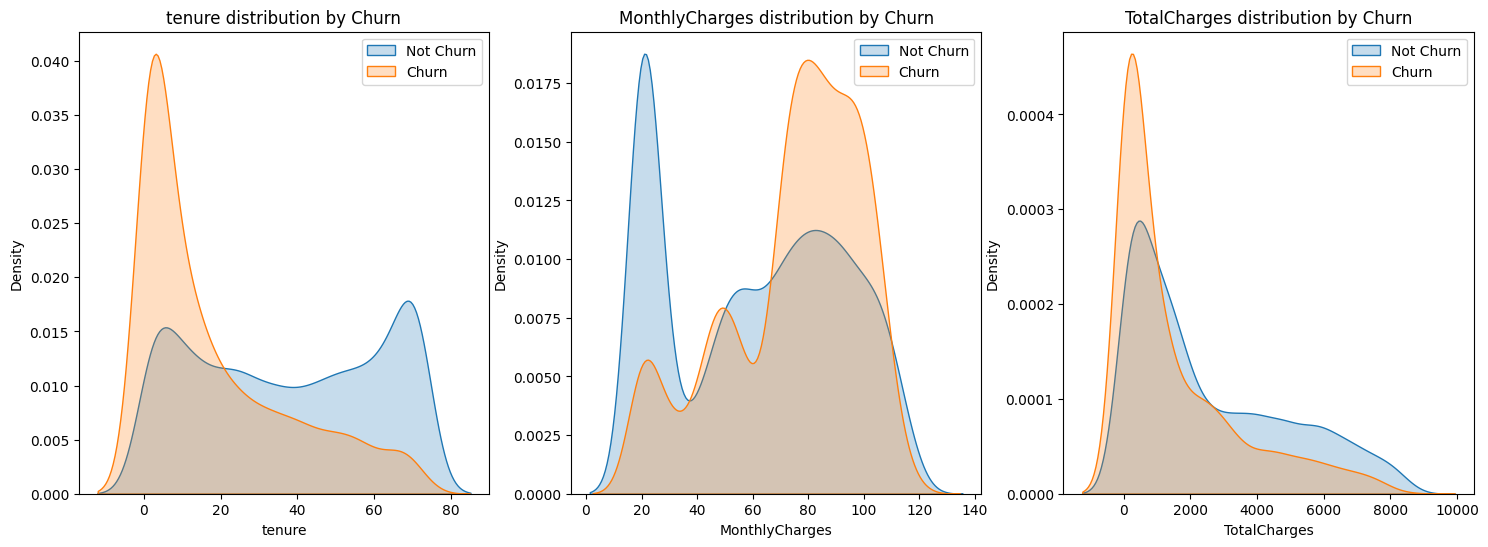

In [13]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

colors = sns.color_palette('tab10')

for num,col in enumerate(cols):
    sns.kdeplot(df[df['Churn'] == 'No'][col], color=colors[0], fill=True, label='Not Churn', ax=ax[num])
    sns.kdeplot(df[df['Churn'] == 'Yes'][col], color=colors[1], fill=True, label='Churn', ax=ax[num])
    ax[num].legend()
    ax[num].set_title(f'{col} distribution by Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

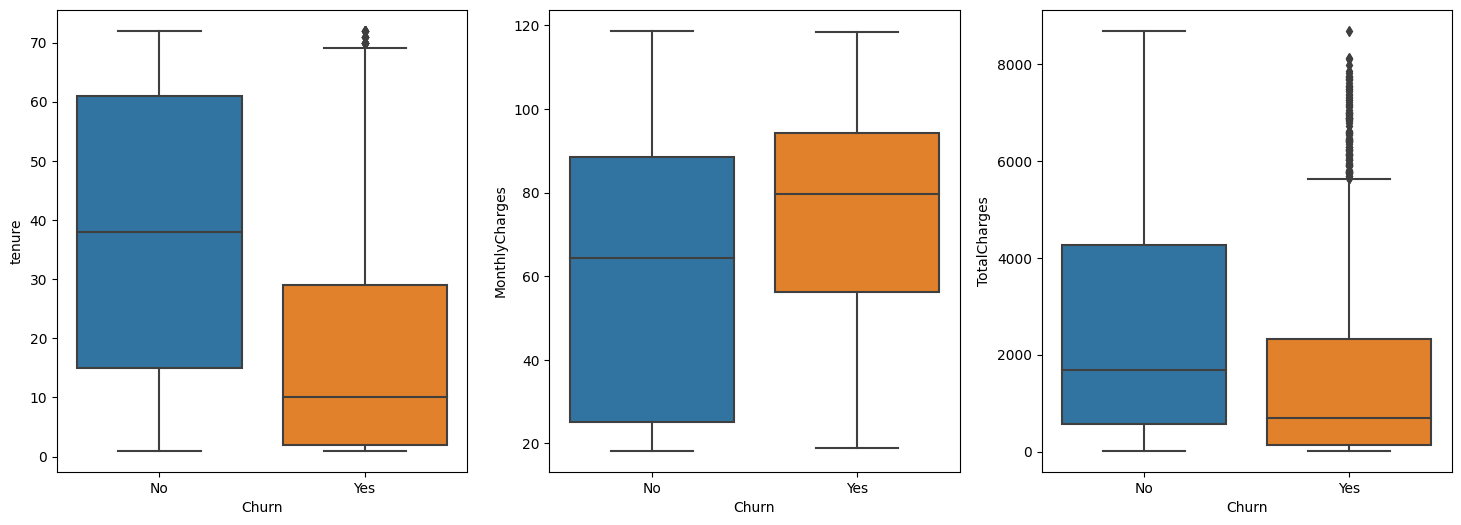

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x='Churn', y='tenure', ax=ax[0])
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=ax[1])
sns.boxplot(data=df, x='Churn', y='TotalCharges', ax=ax[2])

---

From `tenure` visualization, we can see that the percentage of customers who churned is very high in the first year of using company service. The longer a customer uses a company's service, the less likely it is that the customer will churn. The `TotalCharge` visualization also show the same as it is directly correlated to `tenure`. From the `MonthlyCharges` we can see that the percentage of customer is lowest when a customer get charged less than ~30.

---

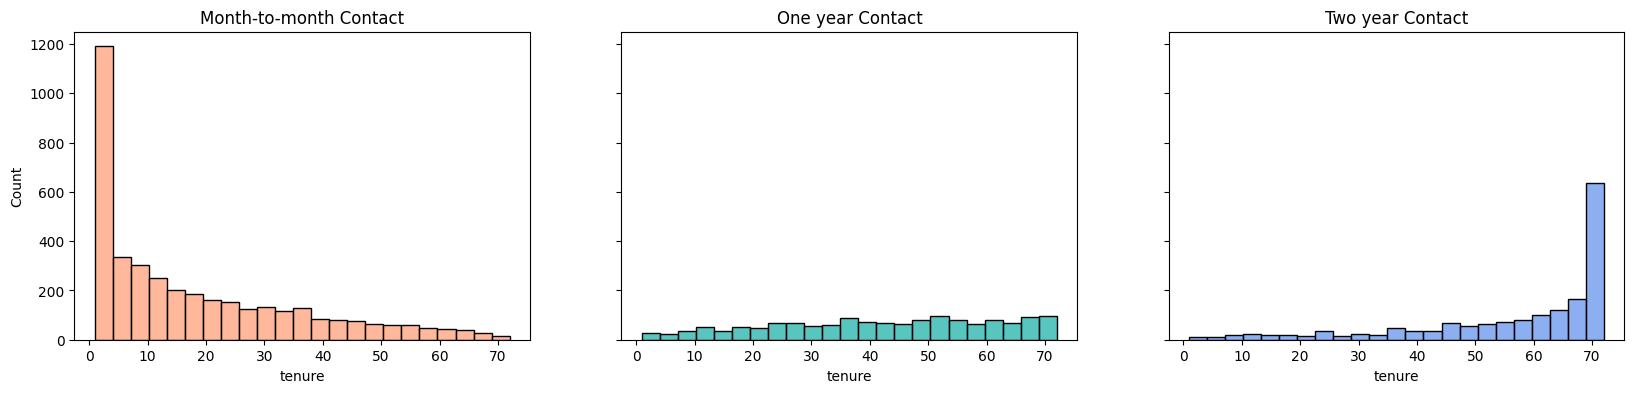

In [15]:
contracts = list(df['Contract'].unique())
color = ['lightsalmon', 'lightseagreen', 'cornflowerblue']

fig, ax = plt.subplots(1,3, figsize=(20,4), sharey=True)

for num, cont in enumerate(contracts):
    sns.histplot(df[df['Contract'] == cont]['tenure'], ax=ax[num], color=color[num], bins=int(70/3))
    ax[num].set_title(f'{cont} Contact')

---

The visualization above shows the tenure distribution for different contract types. We can see that most monthly contracts didn't last long, lasting approximately less than 5 months. In contrast, two-year contracts tend to have significantly longer durations, typically around 70 months.

---

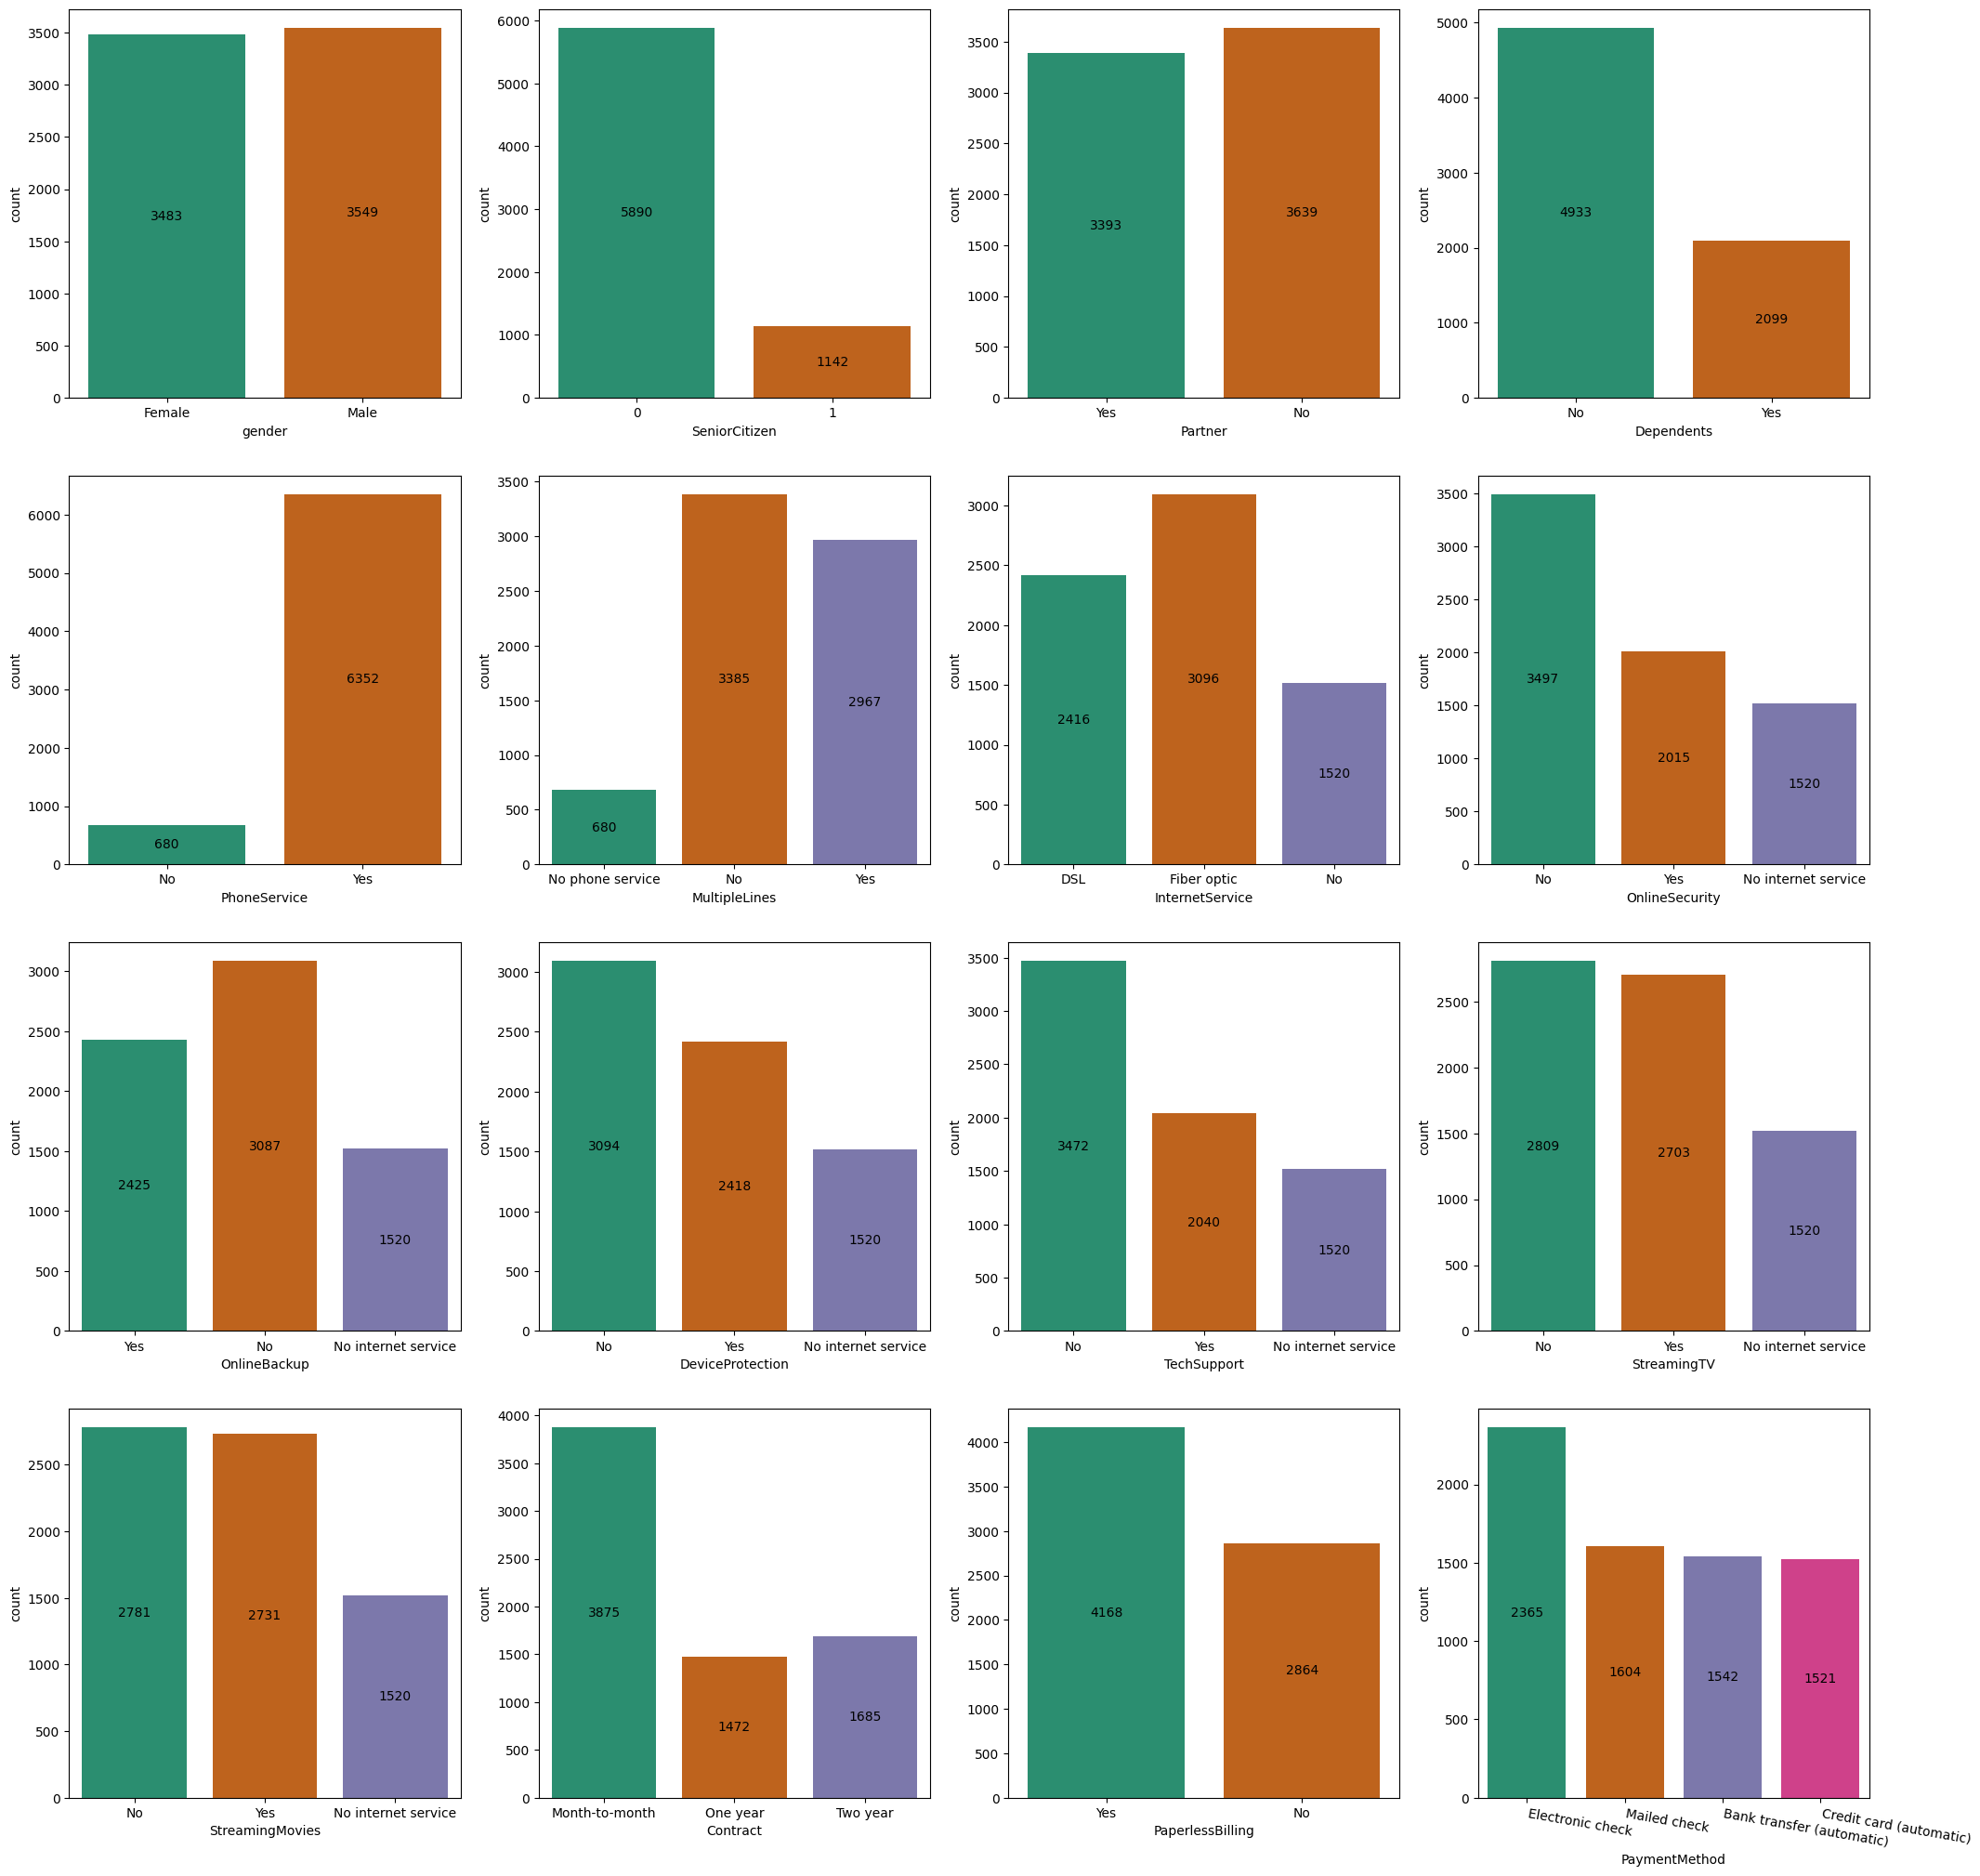

In [16]:
# First thing to do is to select the columns we want
cols = list(df.select_dtypes(include= ['object']).columns)
cols.remove('customerID')
cols.remove('Churn')
cols.insert(1, 'SeniorCitizen')
cols

# Next is to plot all of it inside one figure (Not recommended, but its my personal preference)
fig, ax = plt.subplots(4, 4, figsize=(25,25))

for num,col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=ax[num//4,num%4], palette='Dark2')
    for x in ax[num//4, num%4].containers:
        ax[num//4, num%4].bar_label(x, label_type='center')
    if col == 'PaymentMethod':
        plt.xticks(rotation=350, ha='left')

In [17]:
# First thing to do is to select the columns we want
cols = list(df.select_dtypes(include= ['object']).columns)
cols.remove('customerID')
cols.remove('Churn')
cols.insert(1, 'SeniorCitizen')
cols

# Next is to plot all of it inside one figure (Not recommended, but its my personal preference)
fig, ax = plt.subplots(4, 4, figsize=(25,25))

for num,col in enumerate(cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=ax[num//4,num%4])
    for x in ax[num//4, num%4].containers:
        ax[num//4, num%4].bar_label(x, label_type='center')
    if col == 'PaymentMethod':
        plt.xticks(rotation=350, ha='left')

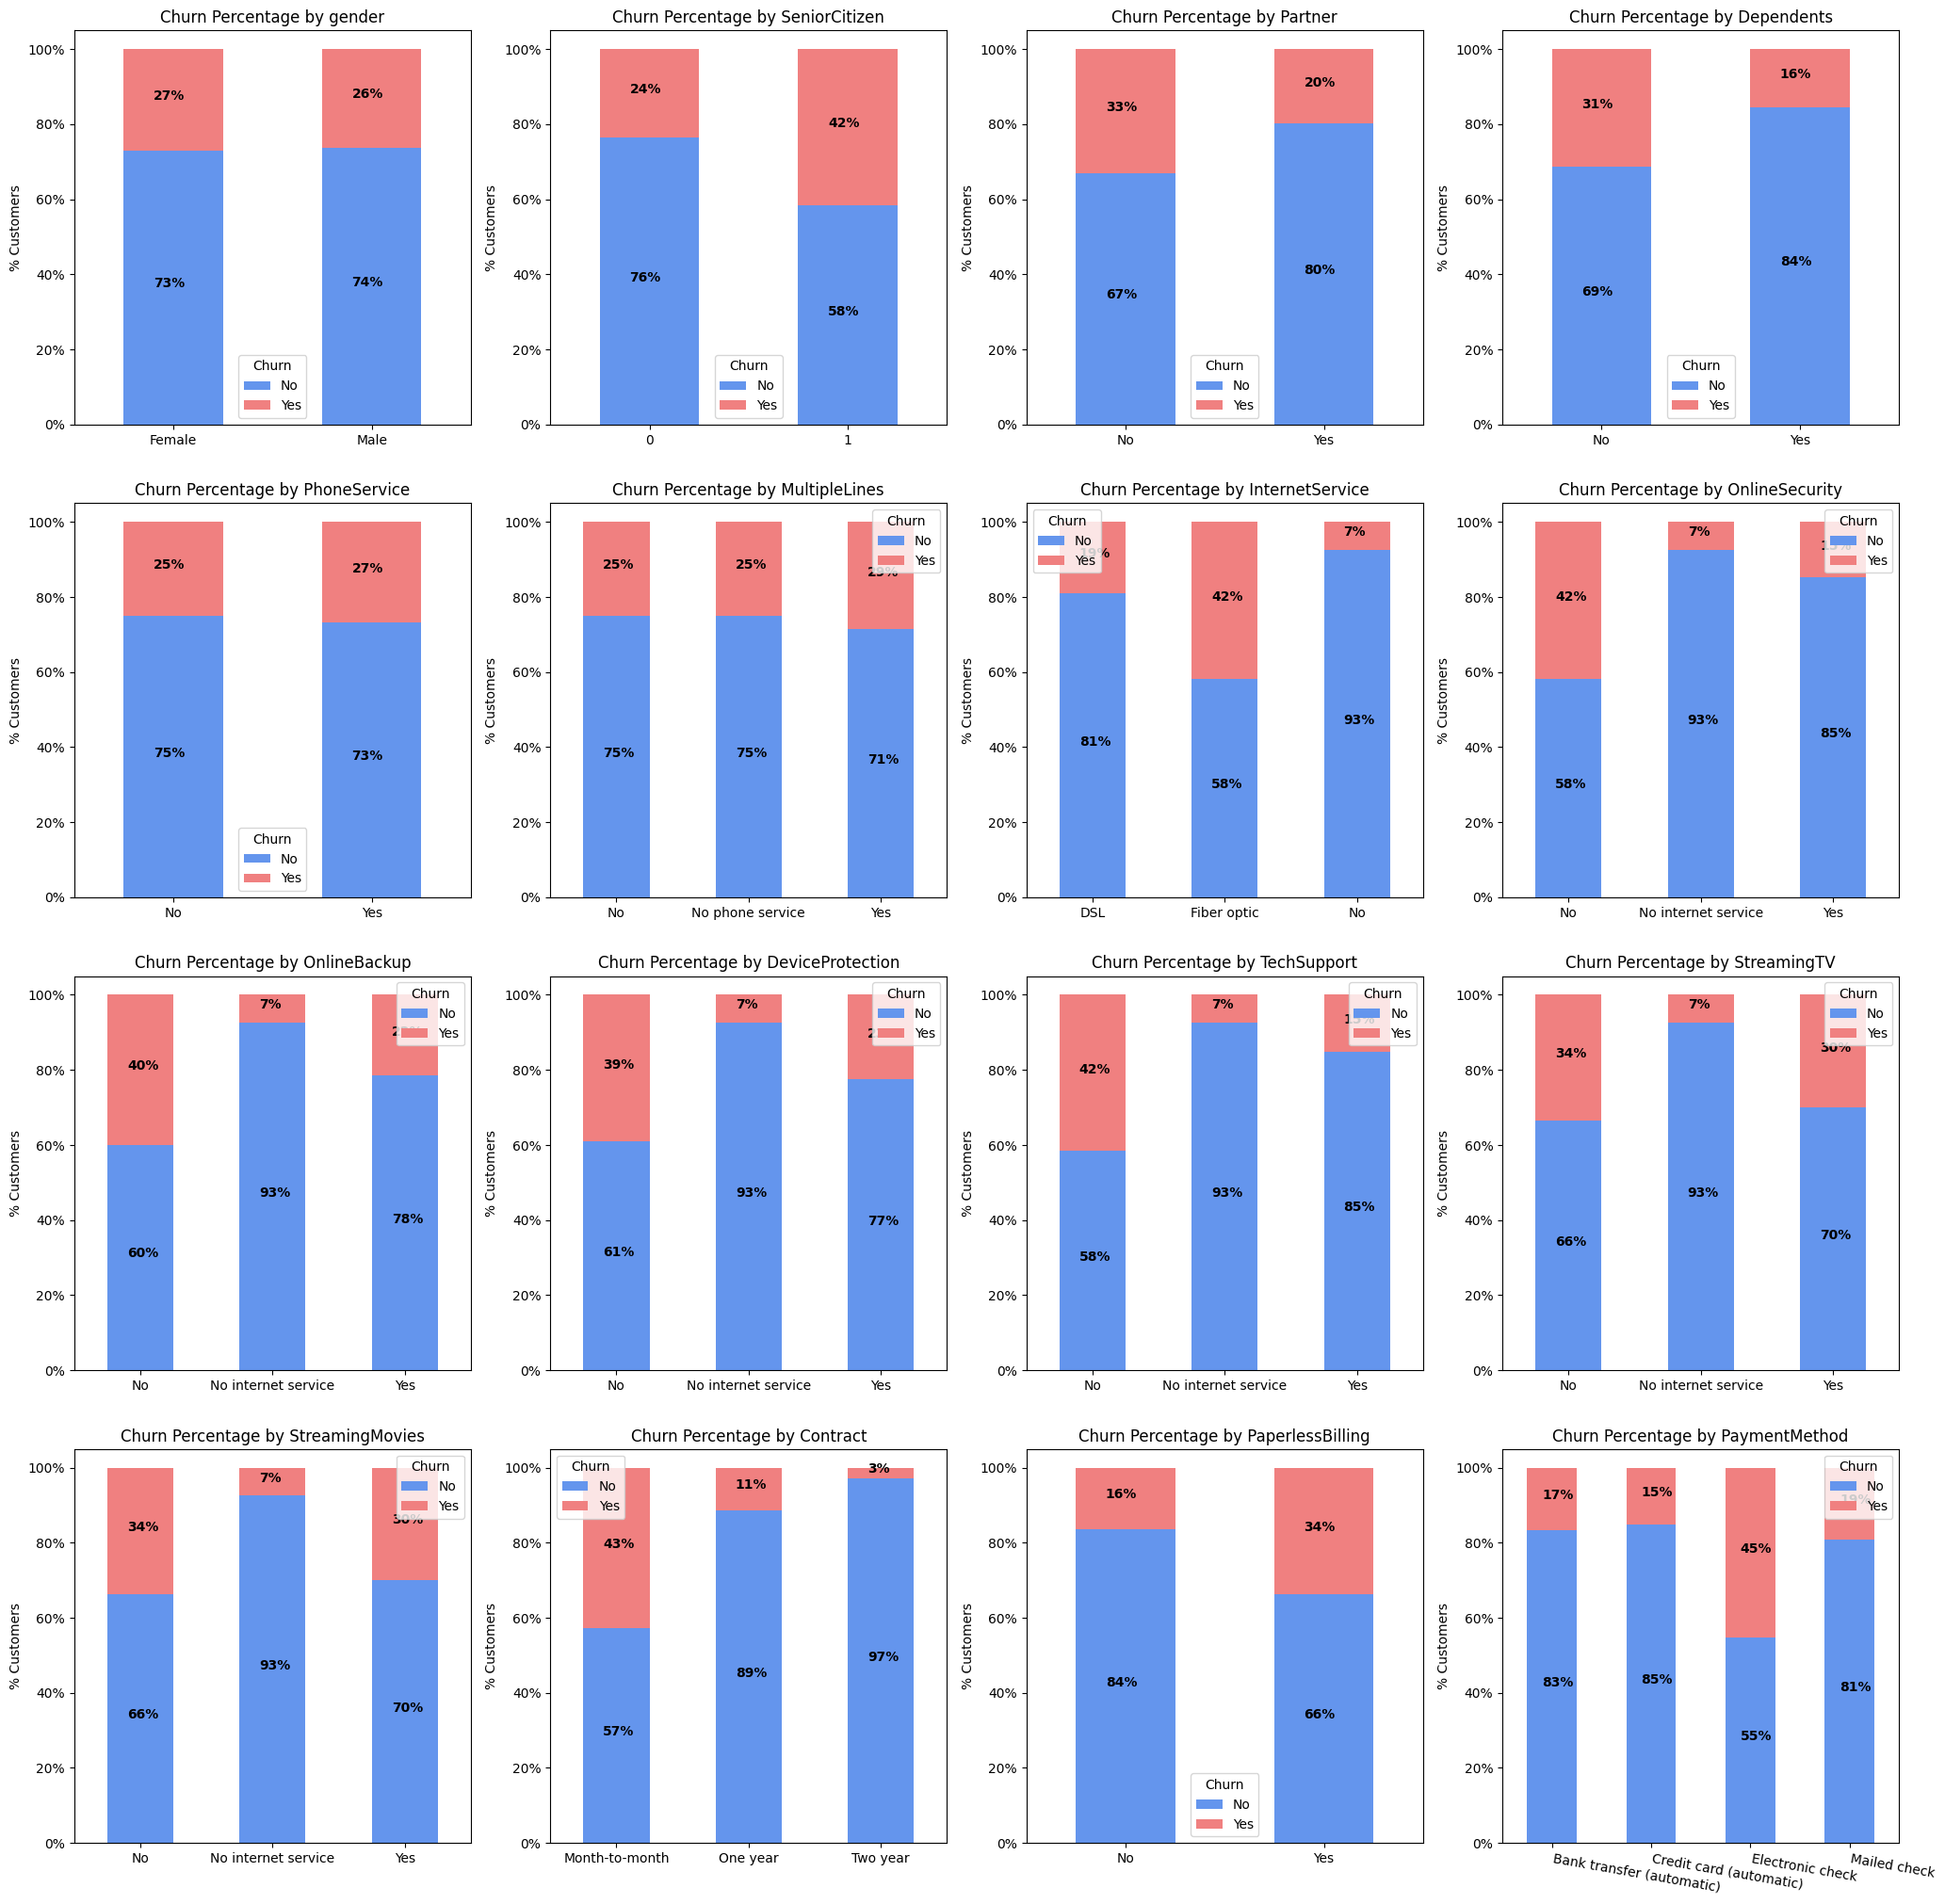

In [18]:
color = ['cornflowerblue', 'lightcoral']

fig, ax = plt.subplots(4, 4, figsize=(25,25))

for num,col in enumerate(cols):
    cust_percent = df.groupby([col, 'Churn']).size().unstack()
    (cust_percent*100).div(cust_percent.sum(axis=1), axis=0).plot(kind='bar',stacked=True, 
                                                                    color=color, ax=ax[num//4,num%4])
    ax[num//4,num%4].yaxis.set_major_formatter(mtick.PercentFormatter())
    ax[num//4,num%4].set_ylabel('% Customers')
    ax[num//4,num%4].set_xlabel('')
    ax[num//4,num%4].set_title(f'Churn Percentage by {col}')
    
    if col == 'PaymentMethod':
        ax[num//4,num%4].set_xticklabels(ax[num//4,num%4].get_xticklabels(), rotation=350, ha='left' )
    else:
        ax[num//4,num%4].set_xticklabels(ax[num//4,num%4].get_xticklabels(), rotation=0)

    for p in ax[num//4,num%4].patches:
        width, height = p.get_width(),  p.get_height()
        ax[num//4,num%4].annotate('{:.0f}%'.format(height), (p.get_x()+0.3*width, p.get_y()+0.5*height),
                   color='black',
                   weight='bold')

Text(0, 0.5, '')

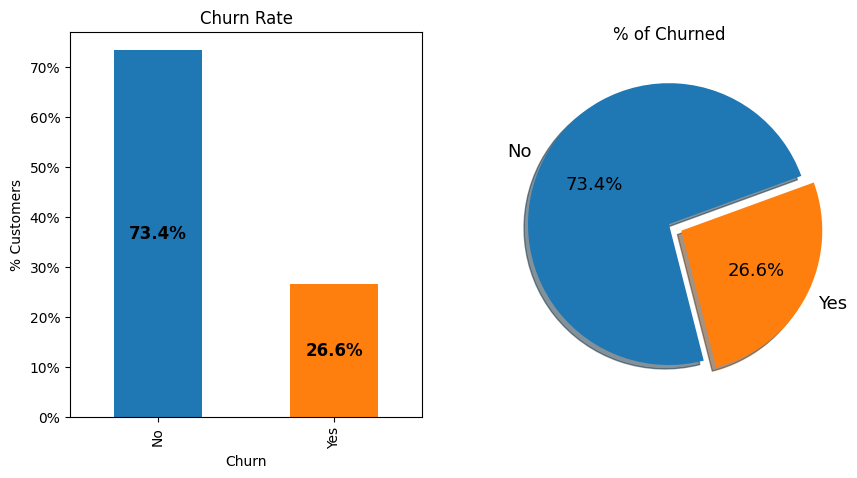

In [19]:
churn_percent = df.groupby('Churn').size()
churn_percent.sum()
churn_percent = churn_percent*100/churn_percent.sum()

fig, (ax, ax1) = plt.subplots(1,2,figsize=(10,5))

colors = sns.color_palette('tab10')
churn_percent.plot(kind='bar', color=colors, ax=ax)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn Rate')

plt.xticks(rotation=0)

annot = []
for i in ax.patches:
    annot.append(f'{round(i.get_height(),1)}%')

ax.bar_label(ax.containers[0], labels=annot, label_type='center', size=12, weight='bold')

churn_percent = df.groupby('Churn').size()
churn_percent.sum()
churn_percent = churn_percent*100/churn_percent.sum()

colors = sns.color_palette('tab10')
churn_percent.plot(kind='pie', shadow=True, explode=(0, 0.1), startangle=20,
                       autopct='%1.1f%%', ax=ax1, textprops={'size': 13})
ax1.set_title('% of Churned')
ax1.set_ylabel('')

---

### Imbalanced Class
In our dataset, 73% of the customers do not churn and only 27% of the customers churn, indicating an imbalance in our data with an almost 1:4 ratio. Although this is quite significant, we will leave it be for now. Later in the modeling section of our project, we will handle this imbalance with oversampling or undersampling techniques.


---

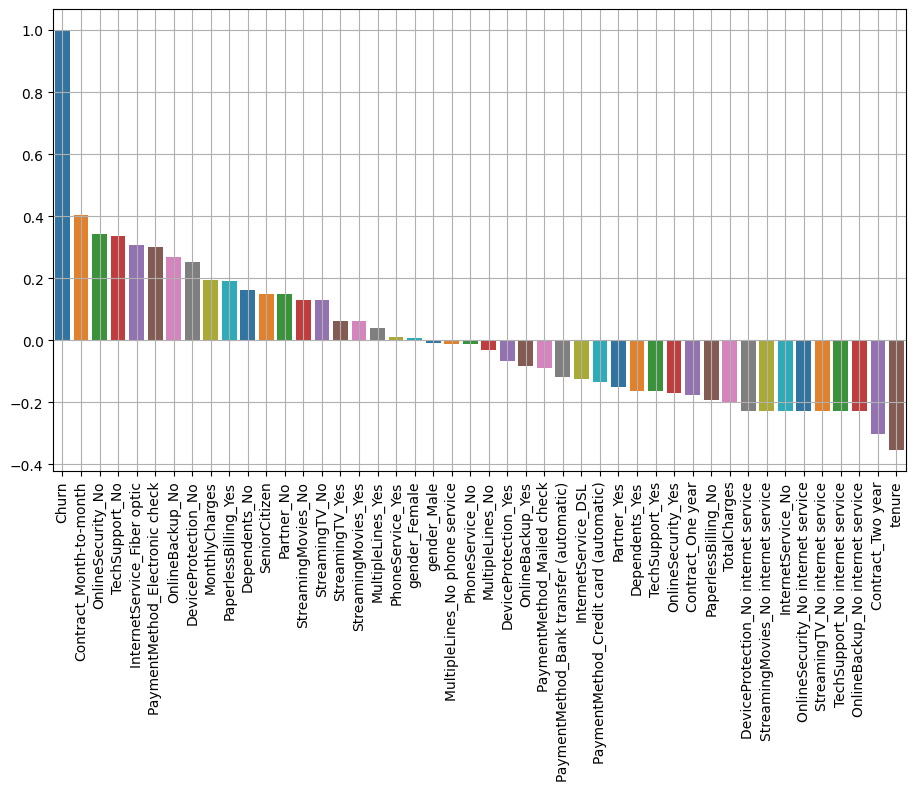

In [20]:
df2 = df.iloc[:,1:]
df2['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df_dummies = pd.get_dummies(df2)
plt.figure(figsize=(11,6))
plt.xticks(rotation=90)
df3 =df_dummies.corr()['Churn'].sort_values(ascending=False)
sns.barplot(x=df3.index, y=df3.values, palette='tab10')
plt.grid(True)

---

There are too much to say about above categorical visualization so i will skip the explanation on this part.

---

## Data Preprocessing and Feature Selection/Engineering

We finished our data visualization. The next step is **Data Processing** where we clean, transform, and possibly reformat our data. There are two main purpose of this step. The **first** is to improve the quality of our data, and the **second** is to ensure that our data can be properly understood by machine learing algorithms.

In this section, we will also performing **Feature Selection/Engineering** which involves selecting or removing features, or possibly creating new features from existing ones, with the goal of improving our machine learning model.

---

In [21]:
# Lets take a look at our data
data_desc()

dataFeatures dataType  dataLength  null  nullPct  unique  \
0         customerID   object        7032     0      0.0    7032   
1             gender   object        7032     0      0.0       2   
2      SeniorCitizen    int64        7032     0      0.0       2   
3            Partner   object        7032     0      0.0       2   
4         Dependents   object        7032     0      0.0       2   
5             tenure    int64        7032     0      0.0      72   
6       PhoneService   object        7032     0      0.0       2   
7      MultipleLines   object        7032     0      0.0       3   
8    InternetService   object        7032     0      0.0       3   
9     OnlineSecurity   object        7032     0      0.0       3   
10      OnlineBackup   object        7032     0      0.0       3   
11  DeviceProtection   object        7032     0      0.0       3   
12       TechSupport   object        7032     0      0.0       3   
13       StreamingTV   object        7032     0      0.0       3   
14   StreamingMovies   object        7032     0      0.0       3   
15          Contract   object        7032     0      0.0       3   
16  PaperlessBilling   object        7032     0      0.0       2   
17     PaymentMethod   object        7032     0      0.0       4   
18    MonthlyCharges  float64        7032     0      0.0    1584   
19      TotalCharges  float64        7032     0      0.0    6530   
20             Churn   object        7032     0      0.0       2   

                                         uniqueSample  
0   [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...  
1                                      [Female, Male]  
2                                              [0, 1]  
3                                           [Yes, No]  
4                                           [No, Yes]  
5   [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...  
6                                           [No, Yes]  
7                         [No phone service, No, Yes]  
8                              [DSL, Fiber optic, No]  
9                      [No, Yes, No internet service]  
10                     [Yes, No, No internet service]  
11                     [No, Yes, No internet service]  
12                     [No, Yes, No internet service]  
13                     [No, Yes, No internet service]  
14                     [No, Yes, No internet service]  
15               [Month-to-month, One year, Two year]  
16                                          [Yes, No]  
17  [Electronic check, Mailed check, Bank transfer...  
18  [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...  
19  [29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5...  
20                                          [No, Yes]

---

#### Removing Feature
The first thing we can do is remove `customerID` column. This column is similar to the index column, as it is only there to identify each customer by their unique ID. Therefore, it **cannot be used to predict** whether a customer will churn or not.

---

In [22]:
# axis=1 is used to drop column(s)
df.drop('customerID', axis=1, inplace=True )

---

#### Converting Categorical Data
Before we continue, it's important to note that machine learning algorithms, at least in the case of sklearn, typically require **input data to be in numerical format**. This means that we should convert any categorical data (object data type) into its numerical form. For categorical data with only two unique values, we can use **0 and 1** to represent each unique value. However, for data with more than two unique values, it becomes a bit more complicated. There are many techniques we can use to convert categorical data with multiple values. In this project, I will use both **Label Encoding** and **One-Hot Encoding**. Label encoding is used for features that have inherent encoding, whereas One-Hot Encoding is used when there is no inherent ordering and when there aren't too many unique values.

---

In [23]:
# Converting categorical data with only two unique values
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [24]:
# Label encoding to categorical data that have inherent ordering
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})
maps = {'No internet service': 0, 'No': 1, 'Yes': 2}
cols = df.columns[8:14]
for col in cols:
    df[col] = df[col].map(maps)
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})


In [25]:
# One Hot Encoding to the remaining categorical data
# Drop first is used to drop the first level of categorical value
internet_dummy = pd.get_dummies(df['InternetService'], drop_first=True, prefix='internet_')
payment_dummy = pd.get_dummies(df['PaymentMethod'], drop_first=True, prefix='payMethod_')

# Add new column to the dataset and drop the previous columns
df = pd.concat([df.drop(['InternetService', 'PaymentMethod'], axis=1), internet_dummy, payment_dummy], axis=1)

# Order the dataframe so that our target column (Churn) is at the last column
col_order = list(df.columns)
col_order.remove('Churn')
col_order.append('Churn')
print(col_order)
df = df[col_order]

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'internet__Fiber optic', 'internet__No', 'payMethod__Credit card (automatic)', 'payMethod__Electronic check', 'payMethod__Mailed check', 'Churn']


---

### Dataset Correlation

This heatmap show correlation of all columns to each other. Sometimes, it can be beneficial to remove columns that are highly correlated to each other (except the target column) as it can cause overfitting to our model.


<Axes: >

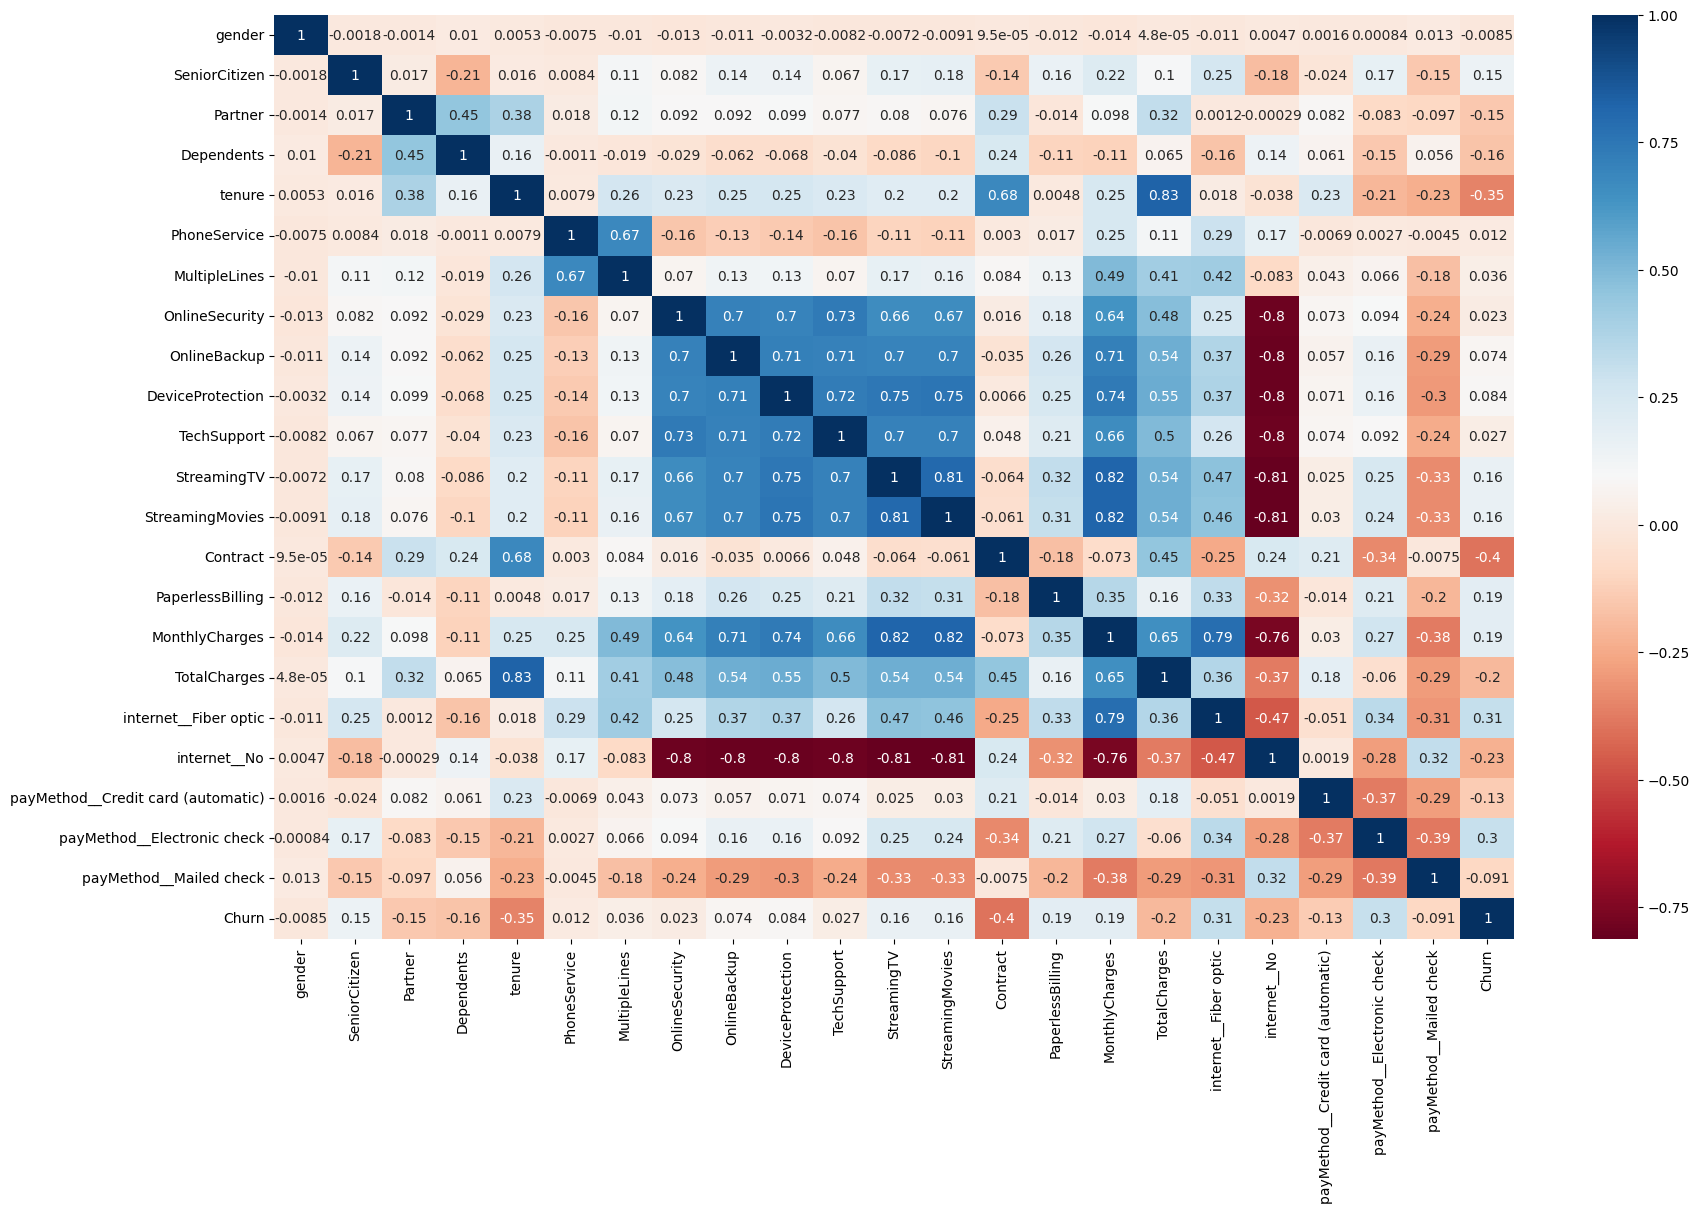

In [26]:
fig, ax = plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, ax=ax)

In [27]:
# not_churn = df[df['Churn'] == 0]
# churn = df[df['Churn'] == 1]
# not_churn = not_churn.sample(len(churn), random_state=101)
# df = pd.concat([churn, not_churn], axis=0)
# df = df.sample(frac=1)

In [28]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               1             2                 1  ...   
1              1               2             1                 2  ...   
2              1               2             2                 1  ...   
3              0               2             1                 2  ...   
4              1               1             1                 1  ...   

   Contract  PaperlessBilling  MonthlyCharges  TotalCharges  \
0         0                 1           29.85         29.85   
1         1                 0           56.95       1889.50   
2         0                 1           53.85        108.15   
3         1                 0           42.30       1840.75   
4         0                 1           70.70        151.65   

   internet__Fiber optic  internet__No  payMethod__Credit card (automatic)  \
0                      0             0                                   0   
1                      0             0                                   0   
2                      0             0                                   0   
3                      0             0                                   0   
4                      1             0                                   0   

   payMethod__Electronic check  payMethod__Mailed check  Churn  
0                            1                        0      0  
1                            0                        1      0  
2                            0                        1      1  
3                            0                        0      0  
4                            1                        0      1  

[5 rows x 23 columns]

---

## Model Building
Now, our data is ready for training our Machine Learning Model. The next step is building a machine learning model. 

---

In [29]:
# Import all module we want to use
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from xgboost import XGBClassifier

---

### Scaling and Splitting Data

Next step is to scale and split data. Scaling the features is essential to ensure that each variable has a similar range, making it easier for the model to learn the underlying patterns. We will use the MinMaxScaler as it is an excellent scaler for our current data, preserving the relative differences between the feature values.

After scaling the features, we need to split the dataset into training and testing sets. The purpose of this split is to assess the model's performance on data that it has not seen before, allowing us to evaluate its generalization capability.

When splitting the data, it is essential to maintain the distribution of the target variable in both the training and testing sets. This is especially crucial in the case of **imbalanced data**, where the target variable is not equally represented in the dataset. To overcome this issue, we can use the `stratify` parameter in `the train_test_split()` function, which ensures that the target class is in the same proportion in both the training and testing sets.

In [30]:
# Split the data to "input data" and "target"
X = df.drop('Churn', axis=1)
y = df['Churn'].values
features = X.columns

## Normalize continuous input to get a better result
## Continuous input we want to normalize is "tenure", "MonthlyCharges", and "TotalCharges"
scaler = MinMaxScaler()

# scale all of the data
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=features)

In [31]:
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=101, stratify=y)

---

### Dealing with Imbalanced Data

The visualization reveals that our data is imbalanced, with over 70% of customers not churning and only 20% churning. This imbalance can result in a biased model that is better at predicting the majority class (i.e., customers who do not churn), which contradicts the purpose of our project, which is to predict customers who will churn. There are many techniques that can be used to handle this issue such as oversampling or undersampling. 

In this project, we are using both oversampling and undersampling. For oversampling we will use **Synthetic Minority Over-Sampling Technique** or **SMOTE**. And for undersampling we will use **Random Under Sample**.

---

#### Synthetic Minority Over-Sampling Technique (SMOTE)

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=101)
X_otrain, y_otrain = smote.fit_resample(X_train,y_train)

In [33]:
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)
X_otrain = pd.DataFrame(X_otrain, columns=features)

#### Random Under Sample

In [34]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=101)
X_utrain, y_utrain = rus.fit_resample(X_train, y_train)

In [35]:
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)
X_otrain = pd.DataFrame(X_otrain, columns=features)
X_utrain = pd.DataFrame(X_utrain, columns=features)

---

### Building Model

We are going to declare our machine learning model and use all the classification algorithms available in scikit-learn (including XGBoost) to predict our data. After comparing all of the algorithms, we will select the one that performs the best based on the various metrics we decide. 

Note that some of the algorithms algorithms already have specific parameters specified, as I have already performed parameter tuning on them using `GridSearchCV`. But the code for this is not included here for visual reasons.


In [36]:
lr = LogisticRegression()
sgd = SGDClassifier(random_state=101)
pcn = Perceptron()
rc = RidgeClassifier()
pac = PassiveAggressiveClassifier(random_state=101,)
dtree = DecisionTreeClassifier(random_state=101)
rfc = RandomForestClassifier(random_state=101, n_estimators = 150, max_depth=10)
gb = GradientBoostingClassifier(random_state=101)
ab = AdaBoostClassifier()
svc = SVC(C=1, class_weight={0:0.4, 1:0.5})
knn = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
mlp = MLPClassifier(random_state=101)
qda = QuadraticDiscriminantAnalysis()
lda = LinearDiscriminantAnalysis()
xgb = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=5,
                   min_child_weight=0.35)

li = [lr, sgd, pcn, rc, pac, dtree, rfc, gb, ab, svc, knn, gnb, mnb, mlp, qda, lda, xgb]

In [37]:
name = str(li)
name = re.sub(r'\([^)]*\)', '', name)
char_remove = ['[', ']']
for char in char_remove:
    name = name.replace(char, '')
name = name.split(', ')

---

### Choosing metrics
Before we start comparing the algorithms, we should first decide on what **metrics** we will use to evaluate our model performance. Usually, we use **accuracy** to evaluate overall model performance. **HOWEVER**, we should keep in mind that our dataset is imbalanced, which can cause the accuracy metric to be misleading. An alternative is **F1 score** which is a good metrics for evaluating overall performance of our model in case of imbalanced data. It is also a good metric for balancing *precision* and *recall*.

**Precision** and **recall** are also good metrics for our dataset. But in our case, we don't know the specifics of our data, such as "which is more costly - the cost of **retaining customer** or the cost of **acquiring customer**". If the cost of **retaining customer** is higher, we would want to minimize our false positive, in other words, maximize our **precision**. On the other hand, if the cost **acquiring customer** is higher, we should minimize our false negatives, in other words, maximize our **recall**.

In conclusion, the best metrics for us is **F1 Score**


### Comparing Model

Now, that we have choosen our metrics we can start comparing our model. For testing the algorithm we will use `cross_validate` function. This function will do a K-Fold Cross-Validation on each of our mode. When doing a cross validation we use a `pipeline` to do an SMOTE oversampling. Then we can start comparing it by using pandas DataFrame and `sort_values` method.

In [38]:
from imblearn.pipeline import Pipeline

met_list = []
for num, tech in enumerate(li):
    # To track our progress
    print(f'Currently in: {name[num]}')
    
    # Using pipeline to combine oversampling and algorithm together.
    pipeline = Pipeline([('sampling', SMOTE(random_state=101)),
                        ('classifier', tech)
                        ])
    
    # Store our score in a variable and append them to a list
    scores = cross_validate(pipeline, X, y, cv=4, scoring=['accuracy', 'precision', 'recall', 'f1'], 
                            return_train_score=True)
    accuracy = sum(scores['test_accuracy'])/len(scores['test_accuracy'])
    precision = sum(scores['test_precision'])/len(scores['test_precision'])
    recall = sum(scores['test_recall'])/len(scores['test_precision'])
    f1 = sum(scores['test_f1'])/len(scores['test_f1'])
    total = (accuracy+precision+recall+f1)/4
    score_list = [accuracy, precision, recall, f1, total]
    met_list.append(score_list)
    
    # To track our progress
    print(f'{len(met_list)}')
    print(f'------------{name[num]} END------------')

Currently in: LogisticRegression
1
------------LogisticRegression END------------
Currently in: SGDClassifier
2
------------SGDClassifier END------------
Currently in: Perceptron
3
------------Perceptron END------------
Currently in: RidgeClassifier
4
------------RidgeClassifier END------------
Currently in: PassiveAggressiveClassifier
5
------------PassiveAggressiveClassifier END------------
Currently in: DecisionTreeClassifier
6
------------DecisionTreeClassifier END------------
Currently in: RandomForestClassifier
7
------------RandomForestClassifier END------------
Currently in: GradientBoostingClassifier
8
------------GradientBoostingClassifier END------------
Currently in: AdaBoostClassifier
9
------------AdaBoostClassifier END------------
Currently in: SVC
10
------------SVC END------------
Currently in: KNeighborsClassifier
11
------------KNeighborsClassifier END------------
Currently in: GaussianNB
12
------------GaussianNB END------------
Currently in: MultinomialNB
13
------

C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


14
------------MLPClassifier END------------
Currently in: QuadraticDiscriminantAnalysis
15
------------QuadraticDiscriminantAnalysis END------------
Currently in: LinearDiscriminantAnalysis
16
------------LinearDiscriminantAnalysis END------------
Currently in: XGBClassifier
17
------------XGBClassifier END------------


In [39]:
# Making a DataFrame so it's easier to compare them
methods = pd.DataFrame(data=met_list, index=name, columns=['accuracy', 'precision', 'recall', 'f1', 'total'])
methods.sort_values('f1', ascending=False)

accuracy  precision    recall        f1  \
AdaBoostClassifier             0.770620   0.552428  0.734093  0.630023   
LogisticRegression             0.753271   0.524191  0.788672  0.629539   
GradientBoostingClassifier     0.787685   0.588581  0.673093  0.627787   
RandomForestClassifier         0.780006   0.571758  0.695037  0.626966   
RidgeClassifier                0.744170   0.512357  0.795629  0.623110   
XGBClassifier                  0.784699   0.584171  0.667744  0.622771   
LinearDiscriminantAnalysis     0.744027   0.512184  0.794560  0.622644   
QuadraticDiscriminantAnalysis  0.753982   0.526101  0.753362  0.619356   
SVC                            0.730802   0.496213  0.805791  0.614100   
SGDClassifier                  0.722127   0.497820  0.799325  0.605657   
GaussianNB                     0.711746   0.475825  0.823983  0.603090   
MultinomialNB                  0.721985   0.486018  0.791341  0.602106   
MLPClassifier                  0.750284   0.523216  0.709467  0.601952   
PassiveAggressiveClassifier    0.694681   0.457812  0.766181  0.572618   
Perceptron                     0.627418   0.418641  0.888126  0.564363   
KNeighborsClassifier           0.695677   0.454890  0.726056  0.559288   
DecisionTreeClassifier         0.732366   0.496939  0.538797  0.516843   

                                  total  
AdaBoostClassifier             0.671791  
LogisticRegression             0.673918  
GradientBoostingClassifier     0.669286  
RandomForestClassifier         0.668442  
RidgeClassifier                0.668816  
XGBClassifier                  0.664846  
LinearDiscriminantAnalysis     0.668354  
QuadraticDiscriminantAnalysis  0.663200  
SVC                            0.661726  
SGDClassifier                  0.656232  
GaussianNB                     0.653661  
MultinomialNB                  0.650362  
MLPClassifier                  0.646230  
PassiveAggressiveClassifier    0.622823  
Perceptron                     0.624637  
KNeighborsClassifier           0.608978  
DecisionTreeClassifier         0.571236

---

### Choosing Model

We will choose some of the best model based on the scoring. After that, we will do some additional parameter tuning to the chosen model. The model chosen are:

1. LogisticRegression
2. RandomForestClassifier
3. AdaBoostClassifier
4. GradientBoostClassifier
5. XGBClassifier

---

## Logistic Regresssion

---

In [40]:
lr = LogisticRegression()

In [41]:
# Training with normal data
# lr.fit(X_train, y_train)

# # Training with oversampled data
lr.fit(X_otrain, y_otrain)

# # Training with undersampled data
# lr.fit(X_utrain, y_utrain)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1291
           1       0.54      0.78      0.64       467

    accuracy                           0.76      1758
   macro avg       0.72      0.77      0.73      1758
weighted avg       0.81      0.76      0.77      1758



[Text(0.5, 1.0, 'Precision-Recall Curve'),
 Text(0.5, 36.72222222222221, 'Recall'),
 Text(1575.6633986928105, 0.5, 'Precision')]

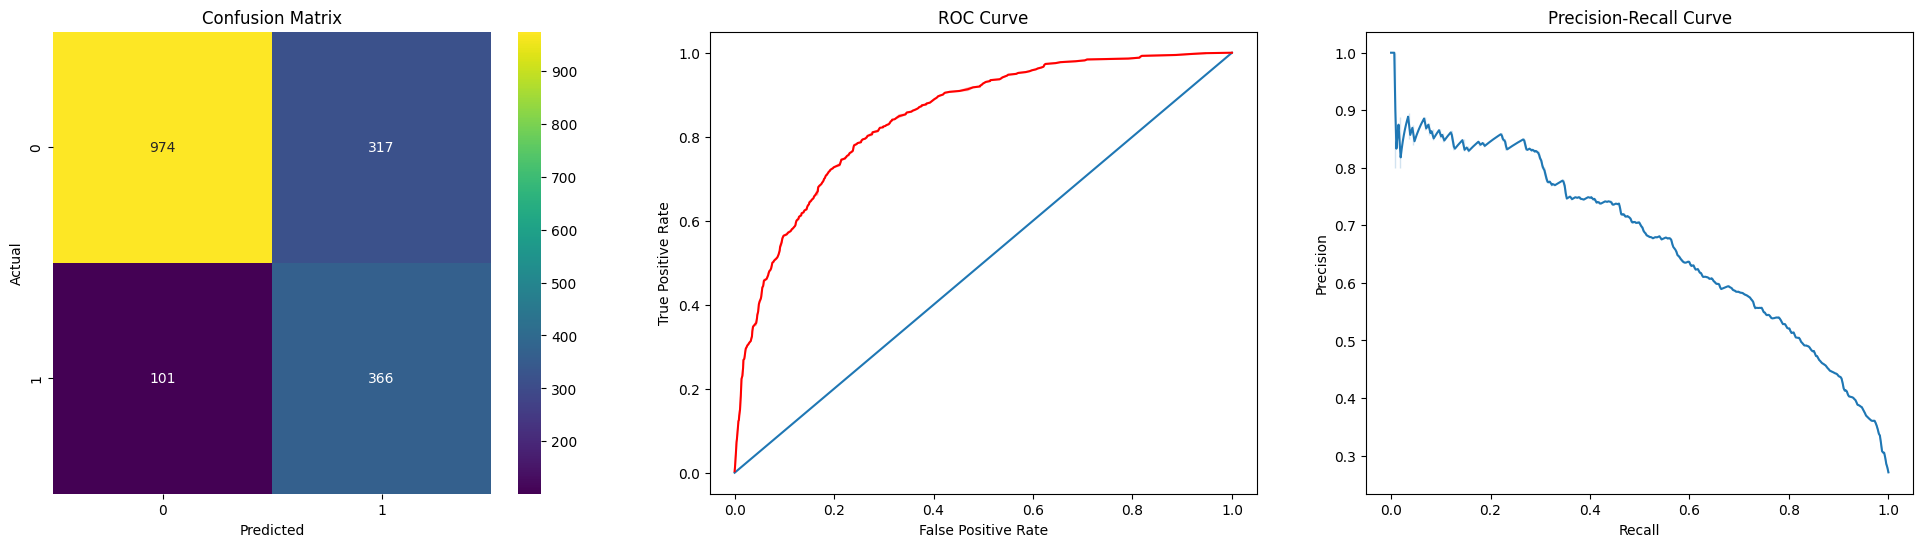

In [42]:
predict = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, predict))
fpr, tpr, rothresh = roc_curve(y_test, y_prob)
prec, rec, prthresh = precision_recall_curve(y_test, y_prob)

fig, ax = plt.subplots(1, 3, figsize=(24,6))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set(xlabel='Predicted', ylabel='Actual', title='Confusion Matrix')

sns.lineplot(x=[0,1], y=[0,1], ax=ax[1])
sns.lineplot(x=fpr, y=tpr, color='red', ax=ax[1])
ax[1].set(title='ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

sns.lineplot(x=rec, y=prec, ax=ax[2])
ax[2].set(title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')

After analyzing the evaluation metrics above, we can see that it didnt exactly give the best result. The **F1 Score** for target class 1 (churned) is only 0.64. Despite this, the model's recall score of 0.78 is quite good, suggesting that the model is relatively successful in identifying positive instances. However, the ROC Curve and Precision-Recall curve do not show good results.

---

---

### Parameter Tuning

Now, we can explore the possibility of performing parameter tuning on our model and see whether it gives an improvement in our performance metric. After parameter tuning, we will compare the performance metrics and see if it gives an improvement

In [43]:
param = {'model__penalty': ['l1', 'l2'],
        'model__C':[0.01, 0.1, 1, 10, 100],
        'model__solver':['liblinear', 'saga', 'lbfgs'],
        'model__fit_intercept':[True, False]
        }

pipeline = Pipeline([('oversample', SMOTE(random_state=101)),
                    ('model', LogisticRegression())])

grid_search = GridSearchCV(pipeline, param_grid=param, cv=4, verbose=2, scoring='f1')
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV] END model__C=0.01, model__fit_intercept=True, model__penalty=l1, model__solver=liblinear; total time=   0.0s
[CV] END model__C=0.01, model__fit_intercept=True, model__penalty=l1, model__solver=liblinear; total time=   0.0s
[CV] END model__C=0.01, model__fit_intercept=True, model__penalty=l1, model__solver=liblinear; total time=   0.0s
[CV] END model__C=0.01, model__fit_intercept=True, model__penalty=l1, model__solver=liblinear; total time=   0.0s
[CV] END model__C=0.01, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.0s
[CV] END model__C=0.01, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.0s
[CV] END model__C=0.01, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.0s
[CV] END model__C=0.01, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.0s
[CV] END model__C=0.01, model__fit_intercept=T

[CV] END model__C=0.1, model__fit_intercept=False, model__penalty=l1, model__solver=saga; total time=   0.0s
[CV] END model__C=0.1, model__fit_intercept=False, model__penalty=l1, model__solver=saga; total time=   0.0s
[CV] END model__C=0.1, model__fit_intercept=False, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=0.1, model__fit_intercept=False, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=0.1, model__fit_intercept=False, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=0.1, model__fit_intercept=False, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=0.1, model__fit_intercept=False, model__penalty=l2, model__solver=liblinear; total time=   0.0s
[CV] END model__C=0.1, model__fit_intercept=False, model__penalty=l2, model__solver=liblinear; total time=   0.0s
[CV] END model__C=0.1, model__fit_intercept=False, model__penalty=l2, model__solver=liblinear; total time=   0.0s


C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END model__C=1, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=1, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=1, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=1, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=1, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=1, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=1, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=1, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=1, model__fit_intercept=False, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C

C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.0s


C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l2, model__solver=liblinear; total time=   0.0s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l2, model__solver=liblinear; total time=   0.0s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l2, model__solver=liblinear; total time=   0.0s
[CV] END model__C=

C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__fit_intercept=True, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l2, model__solver=saga; total time=   0.1s


C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__fit_intercept=True, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l2, model__solver=saga; total time=   0.1s


C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

[CV] END model__C=10, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=10, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=10, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=10, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=10, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=10, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=10, model__fit_intercept=False, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END

C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.1s


C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l2, model__solver=liblinear; total time=   0.0s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l2, model__solver=liblinear; total time=   0.0s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l2, model__solver=liblinear; total time=   0.0s
[CV] END 

C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__fit_intercept=True, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l2, model__solver=saga; total time=   0.1s


C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__fit_intercept=True, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l2, model__solver=saga; total time=   0.1s


C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

[CV] END model__C=100, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=100, model__fit_intercept=True, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__C=100, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=100, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=100, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=100, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=100, model__fit_intercept=False, model__penalty=l1, model__solver=saga; total time=   0.1s

C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mengski\anaconda3\lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "C:\Users\Mengski\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, sel

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('oversample', SMOTE(random_state=101)),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__fit_intercept': [True, False],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='f1', verbose=2)

In [44]:
params = grid_search.best_params_
print(f'Best score:{grid_search.best_score_}.\n{params}')

best_model = grid_search.best_estimator_

Best score:0.6313446707971009.
{'model__C': 1, 'model__fit_intercept': False, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1291
           1       0.53      0.77      0.63       467

    accuracy                           0.76      1758
   macro avg       0.72      0.76      0.72      1758
weighted avg       0.80      0.76      0.77      1758



[Text(0.5, 1.0, 'Precision-Recall Curve'),
 Text(0.5, 36.72222222222221, 'Recall'),
 Text(1575.6633986928105, 0.5, 'Precision')]

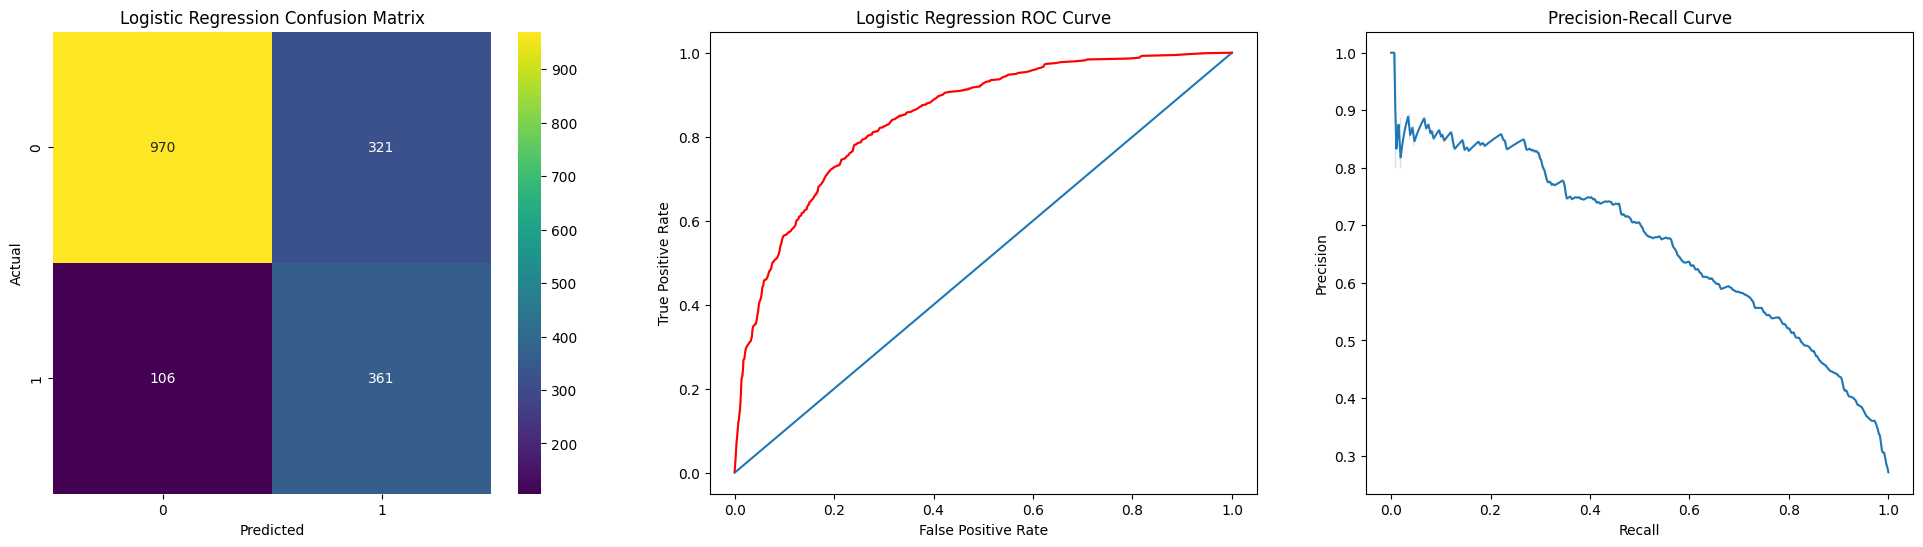

In [45]:
predict = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

print(classification_report(y_test, predict))
y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, rothresh = roc_curve(y_test, y_prob)
prec, rec, prthresh = precision_recall_curve(y_test, y_prob)

fig, ax = plt.subplots(1, 3, figsize=(24,6))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set(xlabel='Predicted', ylabel='Actual', title='Logistic Regression Confusion Matrix')

sns.lineplot(x=[0,1], y=[0,1], ax=ax[1])
sns.lineplot(x=fpr, y=tpr, color='red', ax=ax[1])
ax[1].set(title='Logistic Regression ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

sns.lineplot(x=rec, y=prec, ax=ax[2])
ax[2].set(title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')

The evaluation metric above indicates that our model did not show any improvement, rather, it **got worse** performance than before. We can conclude that the default parameter setting for `LogisticRegression` model is already the optimal parameter configuration for our dataset.

---

## Random Forest Classifier

---

In [46]:
rfc = RandomForestClassifier()

In [47]:
# Training with normal data
# rfc.fit(X_train, y_train)

# # Training with oversampled data
rfc.fit(X_otrain, y_otrain)

# # Training with undersampled data
# rfc.fit(X_utrain, y_utrain)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1291
           1       0.61      0.58      0.59       467

    accuracy                           0.79      1758
   macro avg       0.73      0.72      0.73      1758
weighted avg       0.79      0.79      0.79      1758



[Text(0.5, 1.0, 'Precision-Recall Curve'),
 Text(0.5, 36.72222222222221, 'Recall'),
 Text(1575.6633986928105, 0.5, 'Precision')]

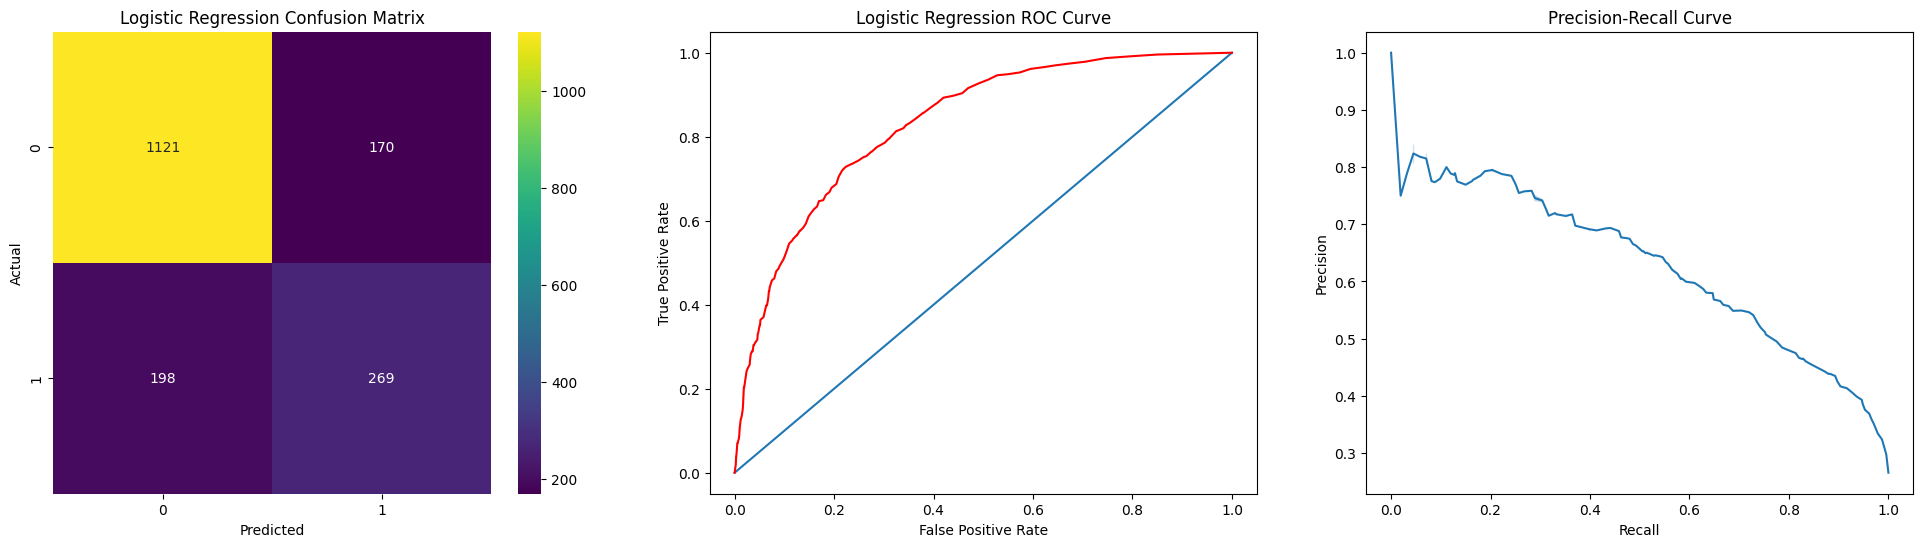

In [48]:
predict = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

print(classification_report(y_test, predict))
fpr, tpr, rothresh = roc_curve(y_test, y_prob)
prec, rec, prthresh = precision_recall_curve(y_test, y_prob)

fig, ax = plt.subplots(1, 3, figsize=(24,6))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set(xlabel='Predicted', ylabel='Actual', title='Logistic Regression Confusion Matrix')

sns.lineplot(x=[0,1], y=[0,1], ax=ax[1])
sns.lineplot(x=fpr, y=tpr, color='red', ax=ax[1])
ax[1].set(title='Logistic Regression ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

sns.lineplot(x=rec, y=prec, ax=ax[2])
ax[2].set(title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')

From the evaluation metrics above, we can conclude that the models performance is considerably poor. Almost all of the metrics for target class 1 (Churn) is below 0.6 (Recall and F1 score). Even though its accuracy is good at 0.79, for imbalanced dataset accuracy score is not a good indicator. Therefore, this model is not worth using.

---

---

### Parameter Tuning

Now, we can do some parameter tuning and see if it improve our `RandomForestClassifier` model

In [49]:
param = {'model__max_depth': [5, 10],
        'model__min_samples_split': [2, 4, 8],
        'model__min_samples_leaf': [1, 8, 15]
        }

pipeline = Pipeline([('oversample', SMOTE(random_state=101)),
                    ('model', RandomForestClassifier())])

grid_search = GridSearchCV(pipeline, param_grid=param, cv=4, verbose=2, scoring='f1')
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=75; total time=   0.2s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=75; total time=   0.2s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=75; total time=   0.2s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=75; total time=   0.2s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.3s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.3s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.3s
[CV] END model__max_depth=5, model__min_sample

[CV] END model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=100; total time=   0.3s
[CV] END model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=100; total time=   0.3s
[CV] END model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=100; total time=   0.3s
[CV] END model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=100; total time=   0.3s
[CV] END model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=200; total time=   0.7s
[CV] END model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=200; total time=   0.7s
[CV] END model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=200; total time=   0.7s
[CV] END model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=

[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200; total time=   1.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200; total time=   1.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200; total time=   1.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200; total time=   1.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=8, model__n_estimators=75; total time=   0.3s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=8, model__n_estimators=75; total time=   0.3s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=8, model__n_estimators=75; total time=   0.3s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=8, model__n_estima

[CV] END model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=4, model__n_estimators=75; total time=   0.3s
[CV] END model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=4, model__n_estimators=75; total time=   0.3s
[CV] END model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=4, model__n_estimators=75; total time=   0.3s
[CV] END model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=4, model__n_estimators=75; total time=   0.3s
[CV] END model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=4, model__n_estimators=100; total time=   0.4s
[CV] END model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=4, model__n_estimators=100; total time=   0.4s
[CV] END model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=4, model__n_estimators=100; total time=   0.4s
[CV] END model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=4, model__n

[CV] END model__max_depth=15, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=100; total time=   0.5s
[CV] END model__max_depth=15, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=100; total time=   0.5s
[CV] END model__max_depth=15, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=100; total time=   0.5s
[CV] END model__max_depth=15, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=100; total time=   0.5s
[CV] END model__max_depth=15, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=200; total time=   1.1s
[CV] END model__max_depth=15, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=200; total time=   1.2s
[CV] END model__max_depth=15, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=200; total time=   1.1s
[CV] END model__max_depth=15, model__min_samples_leaf=8, model__min_samples_split=2, model__n_est

[CV] END model__max_depth=15, model__min_samples_leaf=15, model__min_samples_split=8, model__n_estimators=200; total time=   0.9s
[CV] END model__max_depth=15, model__min_samples_leaf=15, model__min_samples_split=8, model__n_estimators=200; total time=   1.0s
[CV] END model__max_depth=15, model__min_samples_leaf=15, model__min_samples_split=8, model__n_estimators=200; total time=   1.0s
[CV] END model__max_depth=15, model__min_samples_leaf=15, model__min_samples_split=8, model__n_estimators=200; total time=   1.0s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('oversample', SMOTE(random_state=101)),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [5, 10, 15],
                         'model__min_samples_leaf': [1, 8, 15],
                         'model__min_samples_split': [2, 4, 8],
                         'model__n_estimators': [75, 100, 200]},
             scoring='f1', verbose=2)

In [50]:
params = grid_search.best_params_
print(f'Best score:{grid_search.best_score_}.\n{params}')

best_model = grid_search.best_estimator_

Best score:0.6364332814894765.
{'model__max_depth': 10, 'model__min_samples_leaf': 15, 'model__min_samples_split': 2, 'model__n_estimators': 100}


              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1291
           1       0.57      0.72      0.63       467

    accuracy                           0.78      1758
   macro avg       0.73      0.76      0.74      1758
weighted avg       0.80      0.78      0.79      1758



[Text(0.5, 1.0, 'Precision-Recall Curve'),
 Text(0.5, 36.72222222222221, 'Recall'),
 Text(1575.6633986928105, 0.5, 'Precision')]

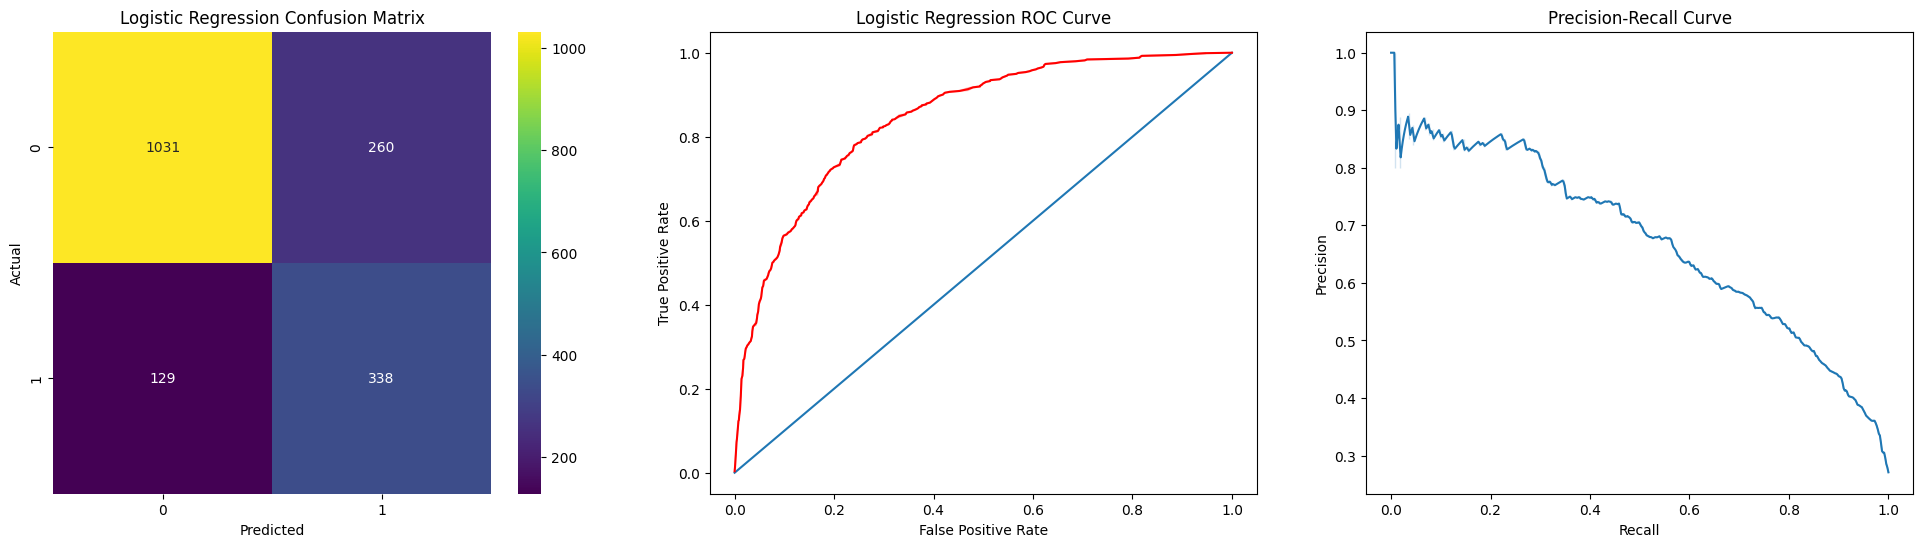

In [51]:
predict = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

print(classification_report(y_test, predict))
y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, rothresh = roc_curve(y_test, y_prob)
prec, rec, prthresh = precision_recall_curve(y_test, y_prob)

fig, ax = plt.subplots(1, 3, figsize=(24,6))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set(xlabel='Predicted', ylabel='Actual', title='Logistic Regression Confusion Matrix')

sns.lineplot(x=[0,1], y=[0,1], ax=ax[1])
sns.lineplot(x=fpr, y=tpr, color='red', ax=ax[1])
ax[1].set(title='Logistic Regression ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

sns.lineplot(x=rec, y=prec, ax=ax[2])
ax[2].set(title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')

Our model improved considerably. While the precision score decrease, f1 score and recall metrics receives a massive boost. It turns out that our previous Random Forest model from before overfits our training data. So in this parameter tuning, we limit the tree depth and set a minimum sample size for each leaf node so it can resolve the overfitting issue and improve model's overall performance

---

---

## AdaBoost

---

In [52]:
abc = AdaBoostClassifier()

In [53]:
# Training with normal data
# abc.fit(X_train, y_train)

# # Training with oversampled data
abc.fit(X_otrain, y_otrain)

# # Training with undersampled data
# abc.fit(X_utrain, y_utrain)

AdaBoostClassifier()

In [54]:
predict = abc.predict(X_test)
y_prob = abc.predict_proba(X_test)[:,1]

print(classification_report(y_test, predict))
fpr, tpr, rothresh = roc_curve(y_test, y_prob)
prec, rec, prthresh = precision_recall_curve(y_test, y_prob)

fig, ax = plt.subplots(1, 3, figsize=(24,6))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set(xlabel='Predicted', ylabel='Actual', title='Logistic Regression Confusion Matrix')

sns.lineplot(x=[0,1], y=[0,1], ax=ax[1])
sns.lineplot(x=fpr, y=tpr, color='red', ax=ax[1])
ax[1].set(title='Logistic Regression ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

sns.lineplot(x=rec, y=prec, ax=ax[2])
ax[2].set(title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')

              precision    recall  f1-score   support

           0       0.89      0.81      0.84      1291
           1       0.57      0.72      0.64       467

    accuracy                           0.78      1758
   macro avg       0.73      0.76      0.74      1758
weighted avg       0.80      0.78      0.79      1758



[Text(0.5, 1.0, 'Precision-Recall Curve'),
 Text(0.5, 36.72222222222221, 'Recall'),
 Text(1575.6633986928105, 0.5, 'Precision')]

Based on the evaluation metrics above, it appears that our model's performance is not that good, as indicated by the target metric, F1 Score, which achieved a score of 0.64. Additionally, the recall score is only average at 0.72, while the precision score is poor at 0.57.

---

---

### Parameter Tuning

Now, we will proceed with tuning our model's parameters with the hope of improving its performance.

In [55]:
param = {'model__n_estimators': [50, 75, 200],
        'model__learning_rate': [0.01, 0.1, 1]
        }

pipeline = Pipeline([('oversample', SMOTE(random_state=101)),
                    ('model', AdaBoostClassifier(random_state=101))])

grid_search = GridSearchCV(pipeline, param_grid=param, cv=4, verbose=2, scoring='f1')
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] END ..model__learning_rate=0.01, model__n_estimators=50; total time=   0.2s
[CV] END ..model__learning_rate=0.01, model__n_estimators=50; total time=   0.2s
[CV] END ..model__learning_rate=0.01, model__n_estimators=50; total time=   0.2s
[CV] END ..model__learning_rate=0.01, model__n_estimators=50; total time=   0.2s
[CV] END ..model__learning_rate=0.01, model__n_estimators=75; total time=   0.3s
[CV] END ..model__learning_rate=0.01, model__n_estimators=75; total time=   0.4s
[CV] END ..model__learning_rate=0.01, model__n_estimators=75; total time=   0.3s
[CV] END ..model__learning_rate=0.01, model__n_estimators=75; total time=   0.3s
[CV] END .model__learning_rate=0.01, model__n_estimators=200; total time=   1.1s
[CV] END .model__learning_rate=0.01, model__n_estimators=200; total time=   1.1s
[CV] END .model__learning_rate=0.01, model__n_estimators=200; total time=   1.1s
[CV] END .model__learning_rate=0.01, model__n_est

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('oversample', SMOTE(random_state=101)),
                                       ('model',
                                        AdaBoostClassifier(random_state=101))]),
             param_grid={'model__learning_rate': [0.01, 0.1, 1],
                         'model__n_estimators': [50, 75, 200]},
             scoring='f1', verbose=2)

In [56]:
params = grid_search.best_params_
print(f'Best score:{grid_search.best_score_}.\n{params}')

best_model = grid_search.best_estimator_

Best score:0.6324993162241633.
{'model__learning_rate': 1, 'model__n_estimators': 75}


              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1291
           1       0.58      0.70      0.64       467

    accuracy                           0.79      1758
   macro avg       0.73      0.76      0.74      1758
weighted avg       0.80      0.79      0.79      1758



[Text(0.5, 1.0, 'Precision-Recall Curve'),
 Text(0.5, 36.72222222222221, 'Recall'),
 Text(1575.6633986928105, 0.5, 'Precision')]

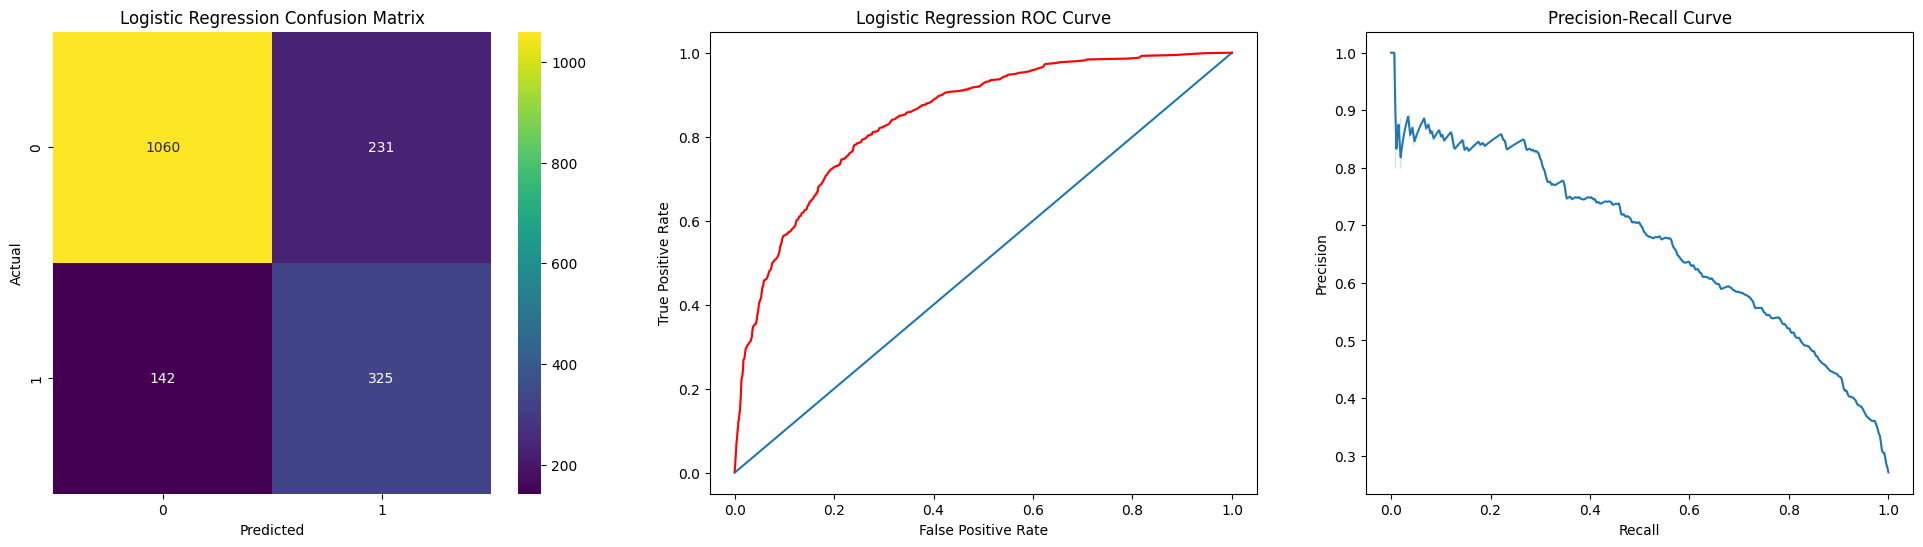

In [57]:
predict = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

print(classification_report(y_test, predict))
y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, rothresh = roc_curve(y_test, y_prob)
prec, rec, prthresh = precision_recall_curve(y_test, y_prob)

fig, ax = plt.subplots(1, 3, figsize=(24,6))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set(xlabel='Predicted', ylabel='Actual', title='Logistic Regression Confusion Matrix')

sns.lineplot(x=[0,1], y=[0,1], ax=ax[1])
sns.lineplot(x=fpr, y=tpr, color='red', ax=ax[1])
ax[1].set(title='Logistic Regression ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

sns.lineplot(x=rec, y=prec, ax=ax[2])
ax[2].set(title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')

In a glance, it might not be apparent whether our model imrpoved or not after parameter tuning. However, if you look closely at our evaluation metrics, we can see that the confusion matrix reveals that our model did indeed improve

---

## Gradient Boosting

---

In [199]:
gbc = GradientBoostingClassifier()

In [200]:
# Training with normal data
# gbc.fit(X_train, y_train)

# # Training with oversampled data
gbc.fit(X_otrain, y_otrain)

# # Training with undersampled data
# gbc.fit(X_utrain, y_utrain)

GradientBoostingClassifier()

In [201]:
predict = gbc.predict(X_test)
y_prob = gbc.predict_proba(X_test)[:,1]

print(classification_report(y_test, predict))
fpr, tpr, rothresh = roc_curve(y_test, y_prob)
prec, rec, prthresh = precision_recall_curve(y_test, y_prob)

fig, ax = plt.subplots(1, 3, figsize=(24,6))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set(xlabel='Predicted', ylabel='Actual', title='Logistic Regression Confusion Matrix')

sns.lineplot(x=[0,1], y=[0,1], ax=ax[1])
sns.lineplot(x=fpr, y=tpr, color='red', ax=ax[1])
ax[1].set(title='Logistic Regression ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

sns.lineplot(x=rec, y=prec, ax=ax[2])
ax[2].set(title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1291
           1       0.59      0.64      0.62       467

    accuracy                           0.79      1758
   macro avg       0.73      0.74      0.73      1758
weighted avg       0.79      0.79      0.79      1758



[Text(0.5, 1.0, 'Precision-Recall Curve'),
 Text(0.5, 36.72222222222221, 'Recall'),
 Text(1575.6633986928105, 0.5, 'Precision')]

Given the evaluation metrics, our model did not perform exceptionally well, but at the same time, it did not perform poorly either. All the metrics for the target class are within the range of 0.6. This suggests that the model is not entirely useless but has room for improvement.

---

### Parameter Tuning

Now, lets do some parameter tuning on our `GradientBoosting` model

---

In [196]:
param = {'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__subsample':[0.5, 0.8, 1]
        }

pipeline = Pipeline([('oversample', SMOTE(random_state=101)),
                    ('model', GradientBoostingClassifier(random_state=101))])

grid_search = GridSearchCV(pipeline, param_grid=param, cv=4, verbose=2, scoring='f1')
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] END model__learning_rate=0.01, model__n_estimators=100, model__subsample=0.5; total time=   0.5s
[CV] END model__learning_rate=0.01, model__n_estimators=100, model__subsample=0.5; total time=   0.5s
[CV] END model__learning_rate=0.01, model__n_estimators=100, model__subsample=0.5; total time=   0.5s
[CV] END model__learning_rate=0.01, model__n_estimators=100, model__subsample=0.5; total time=   0.5s
[CV] END model__learning_rate=0.01, model__n_estimators=100, model__subsample=0.8; total time=   0.7s
[CV] END model__learning_rate=0.01, model__n_estimators=100, model__subsample=0.8; total time=   0.8s
[CV] END model__learning_rate=0.01, model__n_estimators=100, model__subsample=0.8; total time=   0.8s
[CV] END model__learning_rate=0.01, model__n_estimators=100, model__subsample=0.8; total time=   0.8s
[CV] END model__learning_rate=0.01, model__n_estimators=100, model__subsample=1; total time=   0.9s
[CV] END model__learnin

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('oversample', SMOTE(random_state=101)),
                                       ('model',
                                        GradientBoostingClassifier(random_state=101))]),
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.5, 0.8, 1]},
             scoring='f1', verbose=2)

In [197]:
params = grid_search.best_params_
print(f'Best score:{grid_search.best_score_}.\n{params}')

best_model = grid_search.best_estimator_

Best score:0.6324475095026961.
{'model__learning_rate': 0.01, 'model__n_estimators': 200, 'model__subsample': 0.5}


In [198]:
predict = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

print(classification_report(y_test, predict))
y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, rothresh = roc_curve(y_test, y_prob)
prec, rec, prthresh = precision_recall_curve(y_test, y_prob)

fig, ax = plt.subplots(1, 3, figsize=(24,6))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set(xlabel='Predicted', ylabel='Actual', title='Logistic Regression Confusion Matrix')

sns.lineplot(x=[0,1], y=[0,1], ax=ax[1])
sns.lineplot(x=fpr, y=tpr, color='red', ax=ax[1])
ax[1].set(title='Logistic Regression ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

sns.lineplot(x=rec, y=prec, ax=ax[2])
ax[2].set(title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1291
           1       0.53      0.76      0.62       467

    accuracy                           0.76      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.80      0.76      0.77      1758



[Text(0.5, 1.0, 'Precision-Recall Curve'),
 Text(0.5, 36.72222222222221, 'Recall'),
 Text(1575.6633986928105, 0.5, 'Precision')]

From the evaluation metrics, we can conclude that it actually perform worse than before tuning. The **F1 Score** dropped. But **Recall** metrics rise considerably high

---

## XGBoost

---

In [202]:
xgb = XGBClassifier()

In [203]:
# Training with normal data
# xgb.fit(X_train, y_train)

# # Training with oversampled data
xgb.fit(X_otrain, y_otrain)

# # Training with undersampled data
# xgb.fit(X_utrain, y_utrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [204]:
predict = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test, predict))
fpr, tpr, rothresh = roc_curve(y_test, y_prob)
prec, rec, prthresh = precision_recall_curve(y_test, y_prob)

fig, ax = plt.subplots(1, 3, figsize=(24,6))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set(xlabel='Predicted', ylabel='Actual', title='Logistic Regression Confusion Matrix')

sns.lineplot(x=[0,1], y=[0,1], ax=ax[1])
sns.lineplot(x=fpr, y=tpr, color='red', ax=ax[1])
ax[1].set(title='Logistic Regression ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

sns.lineplot(x=rec, y=prec, ax=ax[2])
ax[2].set(title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1291
           1       0.62      0.57      0.59       467

    accuracy                           0.79      1758
   macro avg       0.73      0.72      0.73      1758
weighted avg       0.79      0.79      0.79      1758



[Text(0.5, 1.0, 'Precision-Recall Curve'),
 Text(0.5, 36.72222222222221, 'Recall'),
 Text(1575.6633986928105, 0.5, 'Precision')]

Our model perform considerably poor. Almost all the metrics for target class are below 0.6.

---

### Parameter Tuning

---

In [212]:
param = {'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth':[3,5]
        }

pipeline = Pipeline([('oversample', SMOTE(random_state=101)),
                    ('model', XGBClassifier(random_state=101))])

grid_search = GridSearchCV(pipeline, param_grid=param, cv=4, verbose=2, scoring='f1')
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200; total time=   0.2s
[CV] END model__learning_rate=0.01, model__

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('oversample', SMOTE(random_state=101)),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      impor...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [3, 5],
                         'model__n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)

In [213]:
params = grid_search.best_params_
print(f'Best score:{grid_search.best_score_}.\n{params}')

best_model = grid_search.best_estimator_

Best score:0.6305046415284781.
{'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}


              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1291
           1       0.57      0.72      0.64       467

    accuracy                           0.78      1758
   macro avg       0.73      0.76      0.74      1758
weighted avg       0.80      0.78      0.79      1758



[Text(0.5, 1.0, 'Precision-Recall Curve'),
 Text(0.5, 36.72222222222221, 'Recall'),
 Text(1575.6633986928105, 0.5, 'Precision')]

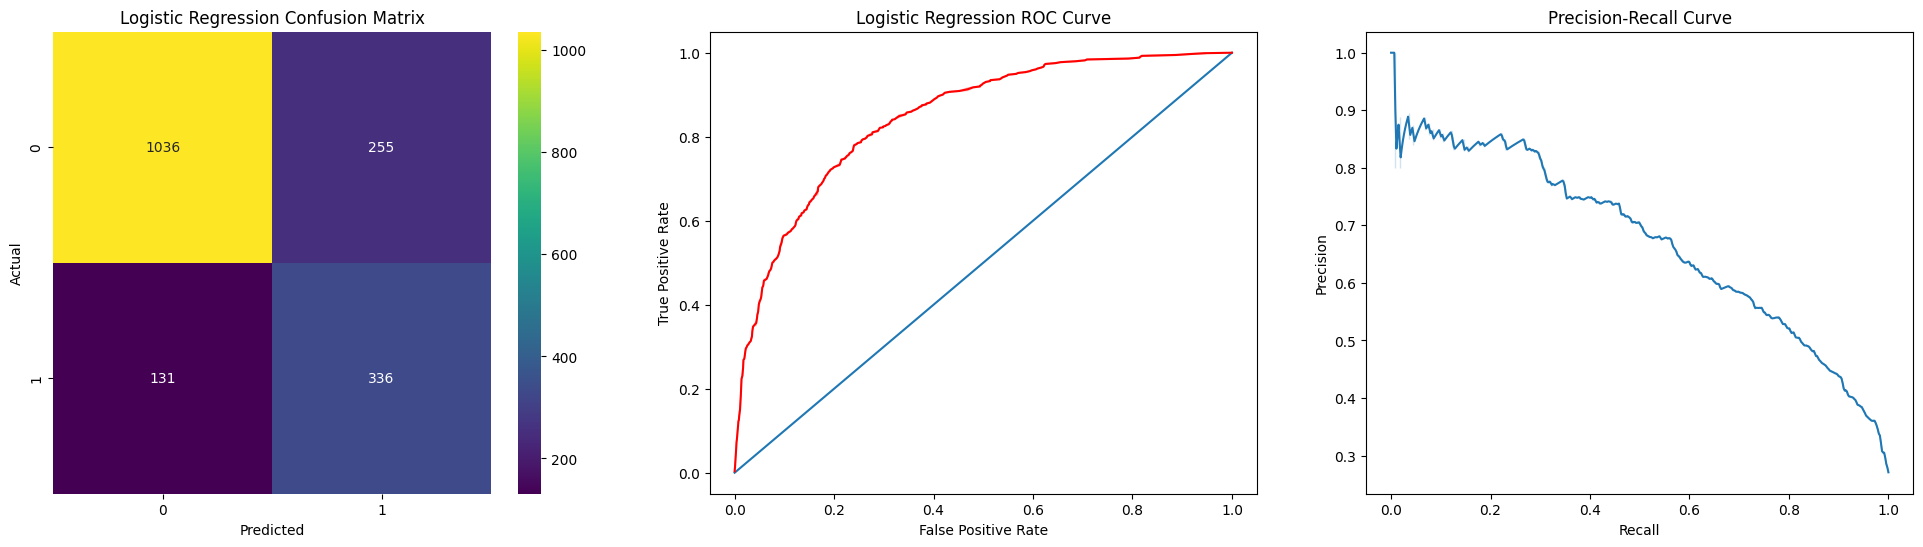

In [214]:
predict = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

print(classification_report(y_test, predict))
y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, rothresh = roc_curve(y_test, y_prob)
prec, rec, prthresh = precision_recall_curve(y_test, y_prob)

fig, ax = plt.subplots(1, 3, figsize=(24,6))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set(xlabel='Predicted', ylabel='Actual', title='Logistic Regression Confusion Matrix')

sns.lineplot(x=[0,1], y=[0,1], ax=ax[1])
sns.lineplot(x=fpr, y=tpr, color='red', ax=ax[1])
ax[1].set(title='Logistic Regression ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

sns.lineplot(x=rec, y=prec, ax=ax[2])
ax[2].set(title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')

After parameter tuning, our overall accuracy dropped. But that's not important. What important is that our **F1** score, which takes into account both precision and recall. In our case, after tuning our parameters, we observed a considerable improvement in the F1 score and recall metrics. This indicates that our model did better after parameter tuning

---

# Conclusion

---

While our models did not achieve exceptional performance, it is important to note that they are not entirely useless.. Out of all models we build, the **Tuned XGBoost Algorithm** and all **AdaBoost Algorithm** models performed the best overall. Not only these models got the best *F1 Score* These model also didnt have an exceptionally low precision score.

Our model didnt really perform well, However, there is still room for further improvement. Possible further improvement are:

* Consider building model with voting classifier
* Build model with stacking classifier
* Extend feature engineering (multicollinearity detection, making new feature, removing unrelated feature, etc)